### References
1. [Store Sales. Time Series Forecast & Visualization](https://www.kaggle.com/maricinnamon/store-sales-time-series-forecast-visualization)


In [148]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [83]:
warnings.filterwarnings("ignore")

### 1. Read data

In [84]:
df_holidays = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
df_stores = pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
df_transaction = pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')

df_train = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
df_test = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')

In [85]:
# convert all 'data' columns to datetime pandas format
df_holidays['date'] = pd.to_datetime(df_holidays['date'], format = '%Y-%m-%d')
df_oil['date'] = pd.to_datetime(df_oil['date'], format = '%Y-%m-%d')
df_transaction['date'] = pd.to_datetime(df_transaction['date'], format = '%Y-%m-%d')
df_train['date'] = pd.to_datetime(df_train['date'], format = '%Y-%m-%d')
df_test['date'] = pd.to_datetime(df_test['date'], format = '%Y-%m-%d')

- holidays
    1. type : 종류 (bridge : 휴일에 추가되는 추가의 날)

In [86]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [87]:
df_holidays[df_holidays.transferred == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [88]:
df_holidays[df_holidays.type == 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [89]:
df_oil.head() # Missing : 43 # 2013-01-01 ~ 2017-08-31

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [90]:
df_transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [91]:
print(df_stores.shape) # 54개의 store
print(df_stores.city.value_counts()) 
print(df_stores.type.value_counts()) # type만 봐도 되지 않을까
#print(df_stores.state.value_counts())
df_stores.head()

(54, 5)
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64
D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [92]:
df_stores[['city','type']].value_counts()

city           type
Quito          D       7
               A       6
               B       3
Guayaquil      C       2
Latacunga      C       2
Cuenca         D       2
Quito          C       2
Guayaquil      E       2
               D       2
Manta          D       1
Playas         C       1
Puyo           C       1
Ambato         A       1
Quevedo        C       1
Machala        D       1
Riobamba       C       1
Salinas        D       1
Santo Domingo  B       1
               C       1
Manta          A       1
Libertad       E       1
Machala        C       1
Loja           D       1
Ambato         D       1
Ibarra         C       1
Guayaquil      B       1
               A       1
Guaranda       C       1
Esmeraldas     E       1
El Carmen      C       1
Daule          D       1
Cuenca         B       1
Cayambe        B       1
Babahoyo       B       1
Santo Domingo  D       1
dtype: int64

- train : 2013-01-01 ~ 2017-08-15
- test  : 2017-08-15 ~ 2017-08-31

- target : test 기간 동안의 store별 family의 sales
- 사용할만한 feature
    - onpromotion : 특정 날짜에 매장에서 판촉된 제품군의 총 항목 수. store, family와 함께 봐야하지 않을까. 제품에 따라 달라질 것 같음. 예를 들어 자주 판촉행사를 하는 store(지역), family(제품군)와 가끔 하는 경우는 다르지 않을까 싶음. 
    - store관련 : transaction, type, cluster
    - family의 종류
    - 참고한 노트북에서는 lag된 y값을 피쳐로 사용. (코드 하단 부에 나옴 3번 내용)
    
    
    
- 성능지표
    - RMSLE: [RMSLE의 의미는 무엇일까?](https://daewonyoon.tistory.com/281)

In [93]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [94]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [95]:
print(df_train.family.unique().shape)
print(df_test.family.unique().shape) ## 33 개의 물건

(33,)
(33,)


### 2. Visualize data

2013년에 oil 가격이 급격히 떨어짐.

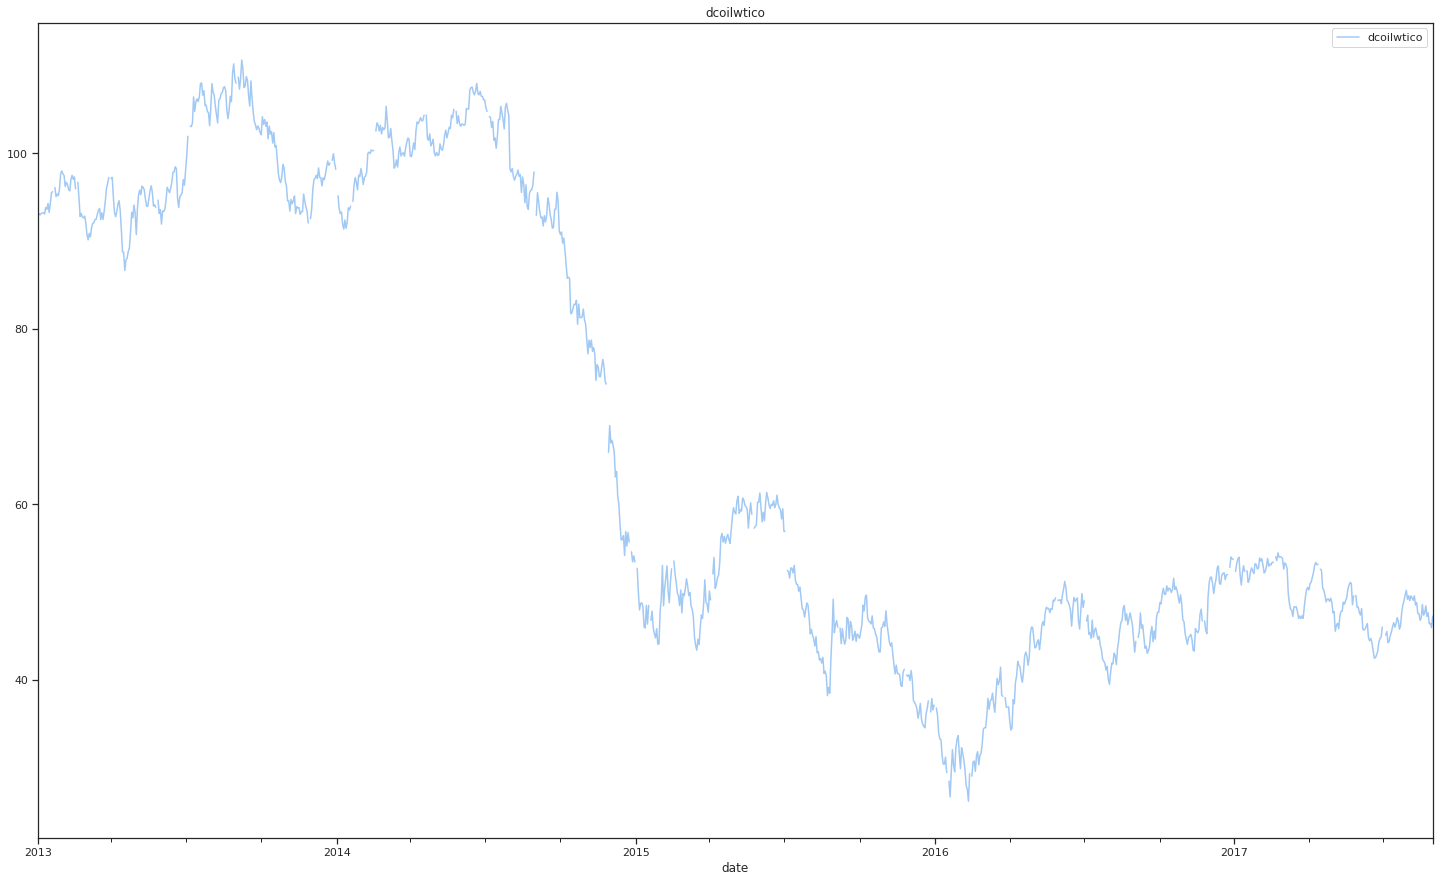

In [96]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,15))
df_oil.plot.line(x = "date", y = "dcoilwtico",color = 'b', title = "dcoilwtico", ax = axes, rot=0)
plt.show()

In [97]:
# 그룹화시키는 함수
def grouped(df, key, freq, col):
    df_grouped = df.groupby([pd.Grouper(key = key, freq = freq)]).agg(mean = (col, 'mean'))
    df_grouped = df_grouped.reset_index()
    return df_grouped

In [98]:
df_grouped_trans_w = grouped(df_transaction, 'date', 'W', 'transactions')
df_grouped_trans_w

,date,mean
0,2013-01-06,1883.203463
1,2013-01-13,1641.090062
2,2013-01-20,1639.024845
3,2013-01-27,1609.816770
4,2013-02-03,1685.263975
...,...,...
237,2017-07-23,1623.208995
238,2017-07-30,1619.653439
239,2017-08-06,1713.743386
240,2017-08-13,1599.156085


In [99]:
# date별 store별로 따로 보면 보이는게 있지 않을까
df_transaction.groupby(['date', 'store_nbr']).agg('mean')

transactions
date       store_nbr              
2013-01-01 25                770.0
2013-01-02 1                2111.0
           2                2358.0
           3                3487.0
           4                1922.0
...                            ...
2017-08-15 50               2804.0
           51               1573.0
           52               2255.0
           53                932.0
           54                802.0

[83488 rows x 1 columns]

In [100]:
df_transaction

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [101]:
# time 열을 추가하는 함수
def add_time(df, key, freq, col):
    df_grouped = grouped(df, key, freq, col)
    df_grouped['time'] = np.arange(len(df_grouped.index))
    column_time = df_grouped.pop('time')
    df_grouped.insert(1, 'time', column_time)
    return df_grouped

In [102]:
# train 데이터에 적용
df_grouped_train_w = add_time(df_train, 'date', 'W', 'sales')
df_grouped_train_m = add_time(df_train, 'date', 'M', 'sales')

In [103]:
# 달별 추이
df_grouped_train_w.head()

,date,time,mean
0,2013-01-06,0,206.843478
1,2013-01-13,1,190.285220
2,2013-01-20,2,189.835452
3,2013-01-27,3,182.152050
4,2013-02-03,4,198.564267


In [104]:
# 월별 추이
df_grouped_train_m.head()

,date,time,mean
0,2013-01-31,0,186.952405
1,2013-02-28,1,193.581846
2,2013-03-31,2,206.880581
3,2013-04-30,3,205.639071
4,2013-05-31,4,209.943594


#### 2.1 Linear Regression 

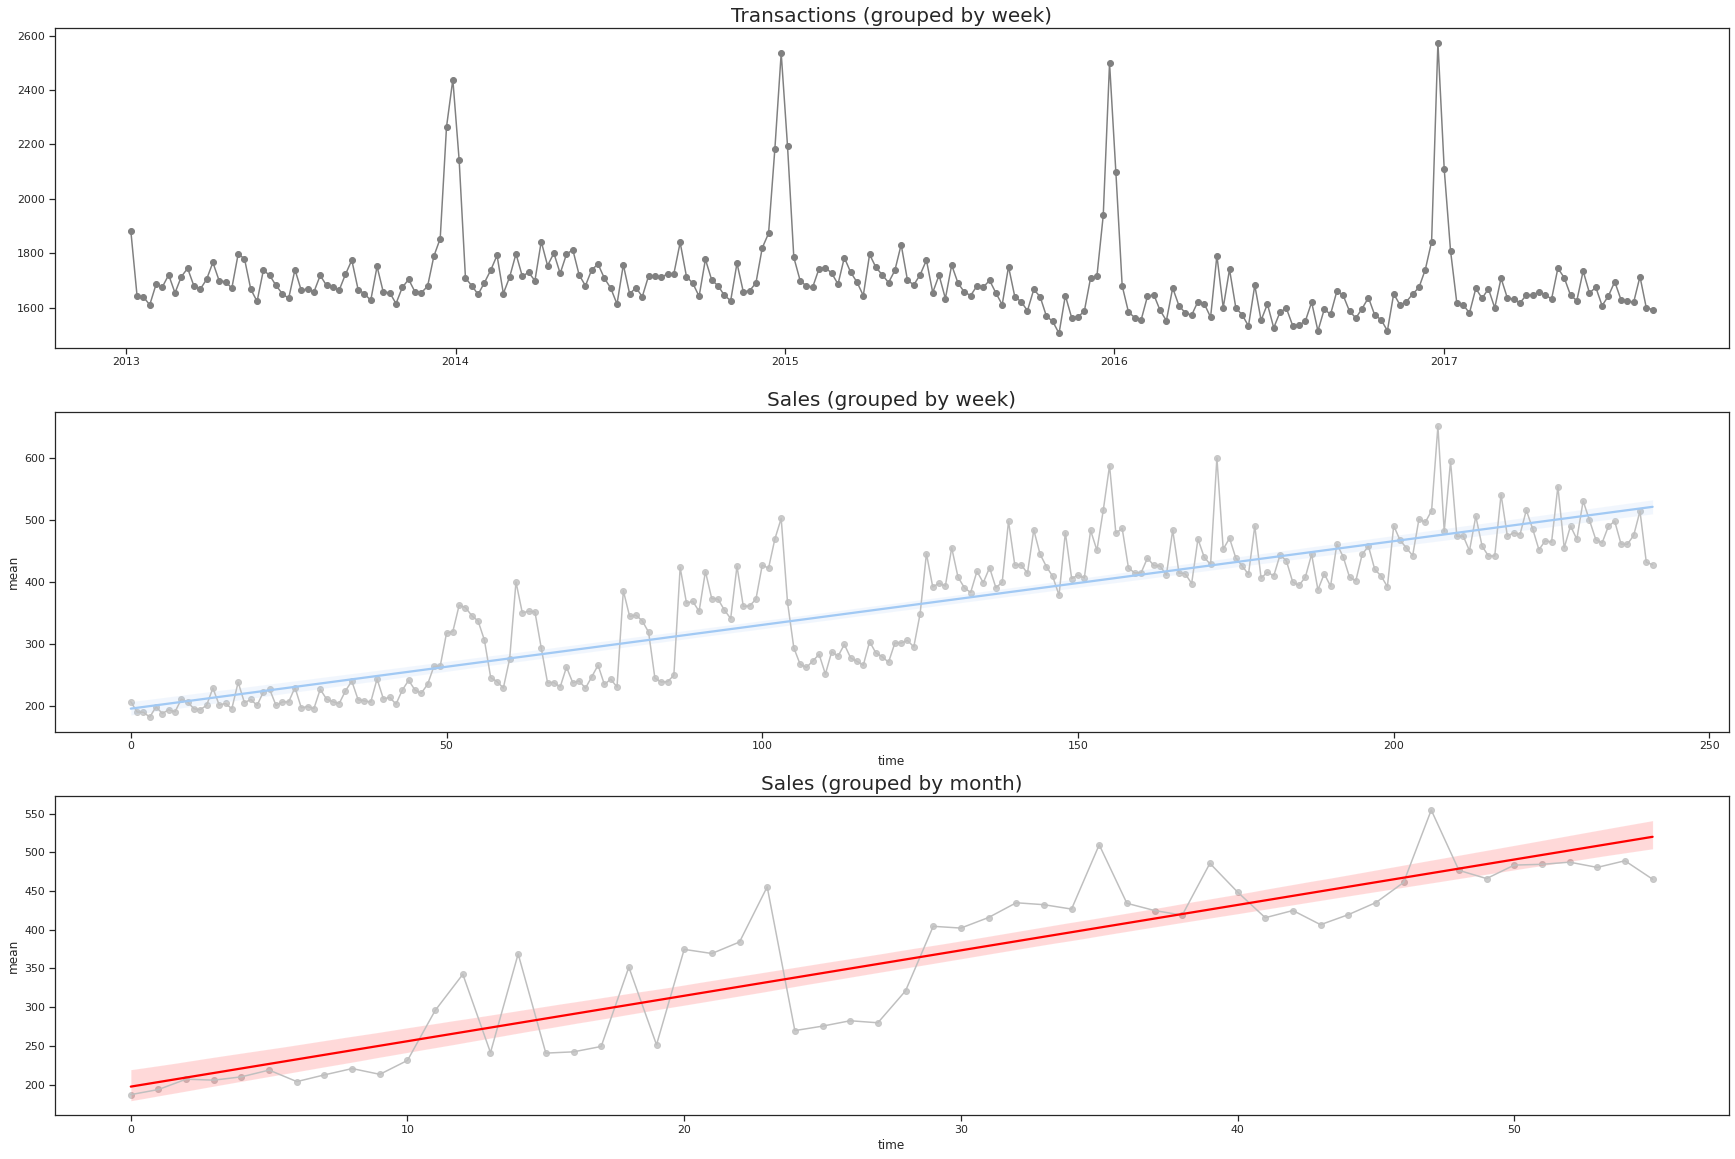

In [105]:
fig, axes = plt.subplots(nrows = 3, ncols =1, figsize = (30,20))

# transactions (weekly)
axes[0].plot('date', 'mean', data = df_grouped_trans_w, color = "grey", marker = 'o')
axes[0].set_title("Transactions (grouped by week)", fontsize = 20)

# sales (weekly)
axes[1].plot('time', 'mean', data=df_grouped_train_w, color = '0.75')
axes[1].set_title('Sales (grouped by week)', fontsize = 20)
# linear regression
axes[1] = sns.regplot(x = 'time', 
                      y = 'mean',
                     data = df_grouped_train_w,
                     scatter_kws = dict(color = '0.75'),
                     ax = axes[1])

# sales (monthly)
axes[2].plot('time', 'mean', data = df_grouped_train_m, color = '0.75')
axes[2].set_title("Sales (grouped by month)", fontsize = 20)
# linear regression
axes[2] = sns.regplot(x='time',
                     y='mean',
                     data=df_grouped_train_m,
                     scatter_kws=dict(color = '0.75'),
                     line_kws = {"color":"red"},
                     ax = axes[2])


plt.show()

#### 2.2 Lag feature
- 지금은 feature와 target이 같은 행에 위치하지만, 관측된 feature를 이용하여 target을 예측해야 하기 때문에 시점을 한 단계 앞으로 당길 필요가 있다. 단계는 1이 아니여도 된다.

In [106]:
# lag 함수
def add_lag(df, key, freq, col, lag):
    df_grouped = grouped(df, key, freq, col)
    name = 'Lag_' + str(lag)
    df_grouped['Lag'] = df_grouped['mean'].shift(lag)
    return df_grouped

In [107]:
df_grouped_train_w_lag1 = add_lag(df_train, 'date', 'W', 'sales', 1)
df_grouped_train_m_lag1 = add_lag(df_train, 'date', 'M', 'sales', 1)

In [108]:
df_grouped_train_w_lag1.head()

,date,mean,Lag
0,2013-01-06,206.843478,NaN
1,2013-01-13,190.285220,206.843478
2,2013-01-20,189.835452,190.285220
3,2013-01-27,182.152050,189.835452
4,2013-02-03,198.564267,182.152050


In [109]:
df_grouped_train_m_lag1.head()

,date,mean,Lag
0,2013-01-31,186.952405,NaN
1,2013-02-28,193.581846,186.952405
2,2013-03-31,206.880581,193.581846
3,2013-04-30,205.639071,206.880581
4,2013-05-31,209.943594,205.639071


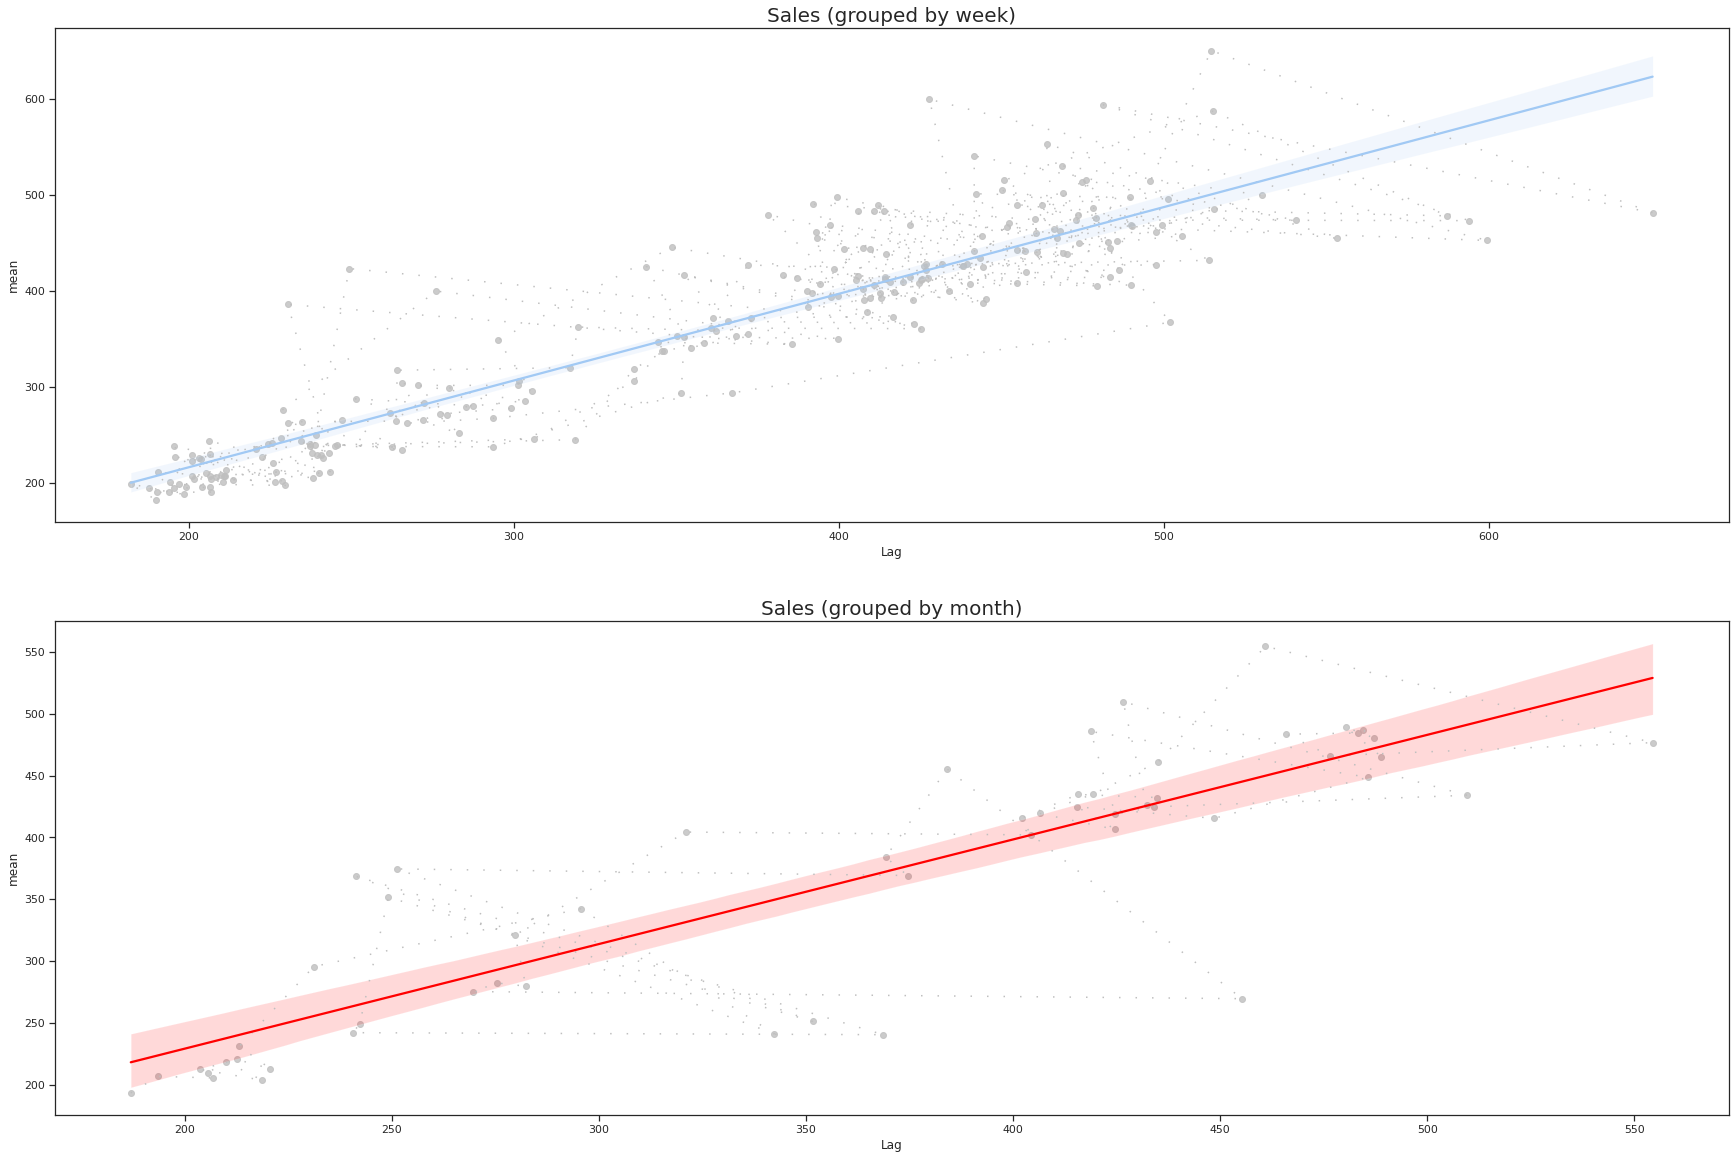

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
axes[0].plot('Lag', 'mean', data=df_grouped_train_w_lag1, color='0.75', linestyle=(0, (1, 10)))
axes[0].set_title("Sales (grouped by week)", fontsize=20)
axes[0] = sns.regplot(x='Lag', 
                      y='mean', 
                      data=df_grouped_train_w_lag1, 
                      scatter_kws=dict(color='0.75'), 
                      ax = axes[0])


axes[1].plot('Lag', 'mean', data=df_grouped_train_m_lag1, color='0.75', linestyle=(0, (1, 10)))
axes[1].set_title("Sales (grouped by month)", fontsize=20)
axes[1] = sns.regplot(x='Lag', 
                      y='mean', 
                      data=df_grouped_train_m_lag1, 
                      scatter_kws=dict(color='0.75'), 
                      line_kws={"color": "red"},
                      ax = axes[1])

plt.show()

#### 3.3 some more statistics & visualizations

In [111]:
def plot_stats(df, column, ax, color, angle):
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette = color)
    ax.set_title(column.upper(), fontsize = 18)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

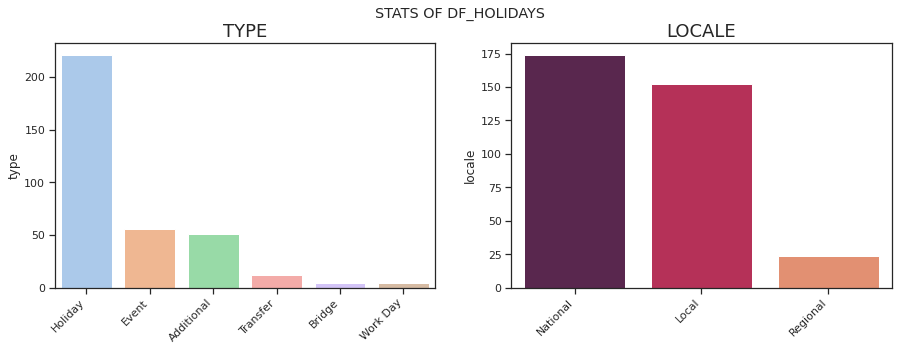

In [112]:
# holiday
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (15,5))
fig.autofmt_xdate()
fig.suptitle("Stats of df_holidays".upper())
plot_stats(df_holidays, "type", axes[0], "pastel", 45)
plot_stats(df_holidays, "locale", axes[1], "rocket", 45)
plt.show()

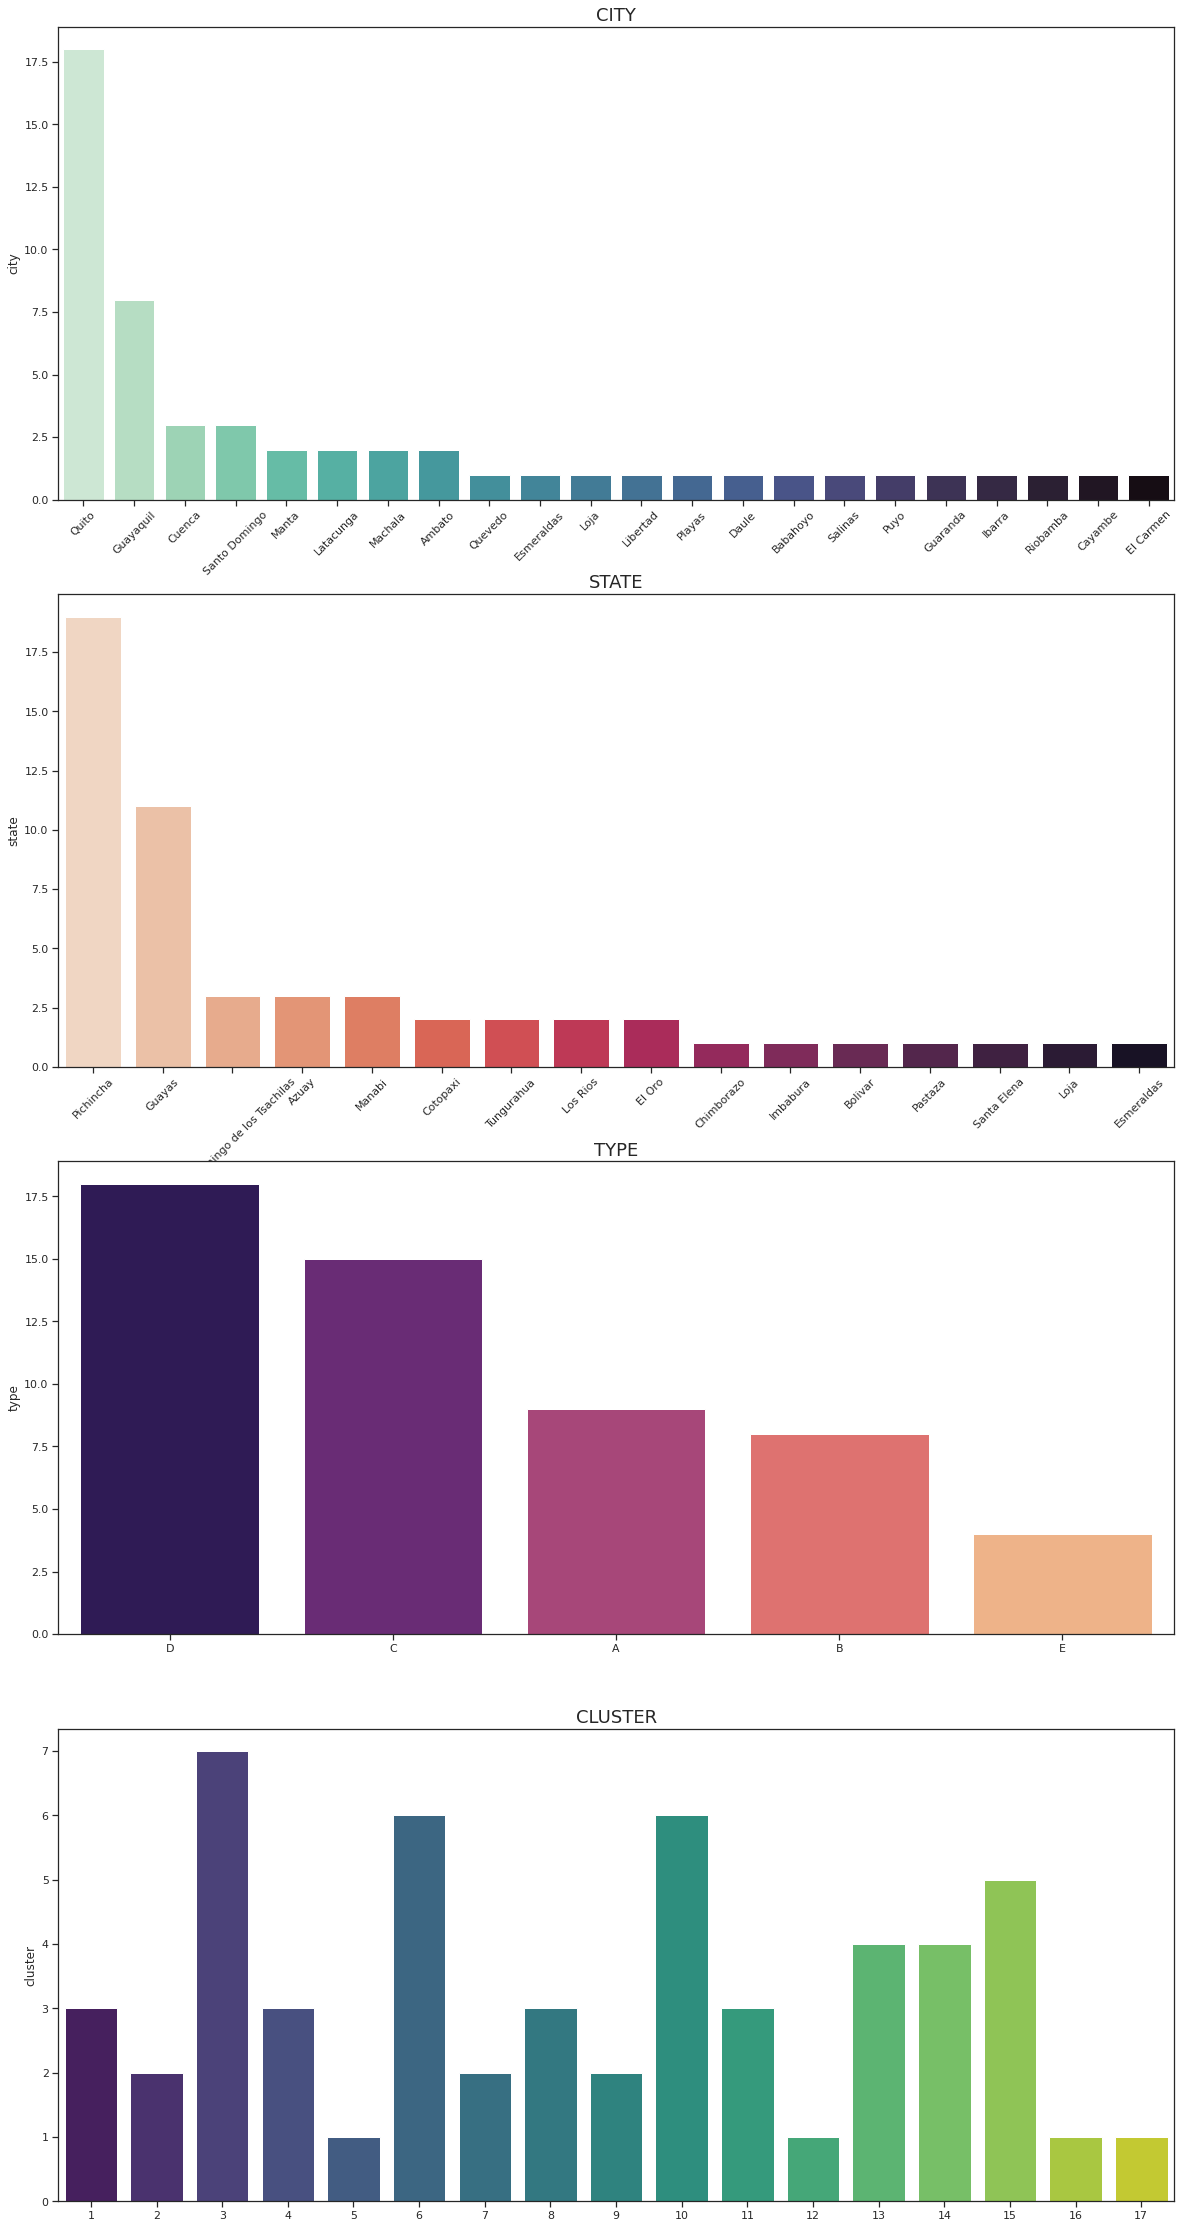

In [113]:
# stores
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,40))
plot_stats(df_stores, "city", axes[0], "mako_r", 45)
plot_stats(df_stores, "state", axes[1], "rocket_r", 45)
plot_stats(df_stores, "type", axes[2], "magma", 0)
plot_stats(df_stores, "cluster", axes[3], "viridis", 0)
plt.show()

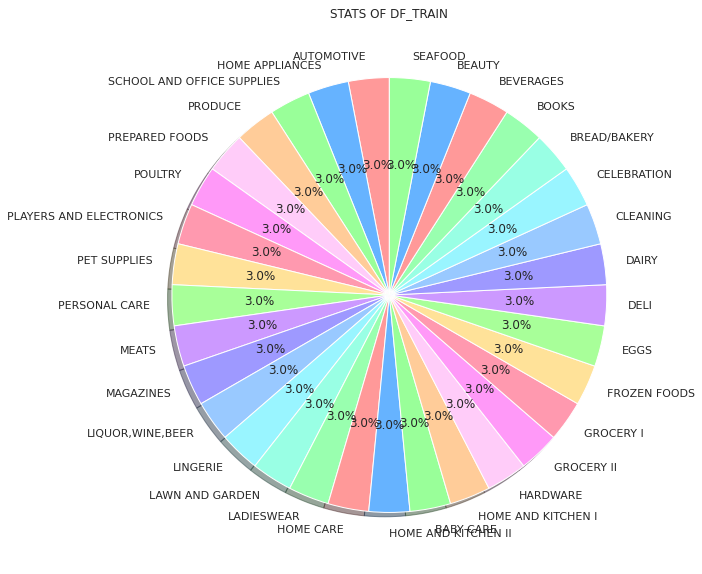

In [114]:
# df_train - family
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
count_classes = df_train['family'].value_counts()
plt.title("Stats of df_train".upper())
colors = ['#ff9999','#66b3ff','#99ff99',
          '#ffcc99', '#ffccf9', '#ff99f8', 
          '#ff99af', '#ffe299', '#a8ff99',
          '#cc99ff', '#9e99ff', '#99c9ff',
          '#99f5ff', '#99ffe4', '#99ffaf']

plt.pie(count_classes, 
        labels = count_classes.index, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90, 
        colors=colors)

plt.show()

#### 2.4 boxplot

In [115]:
# boxplot 함수
def plot_boxplot(palette, x, y, hue, ax, title):
    sns.set_theme(style = "ticks", palette = palette)
    ax = sns.boxplot(x=x, y=y, hue = hue, ax=ax)
    ax.set_title(title, fontsize = 18)

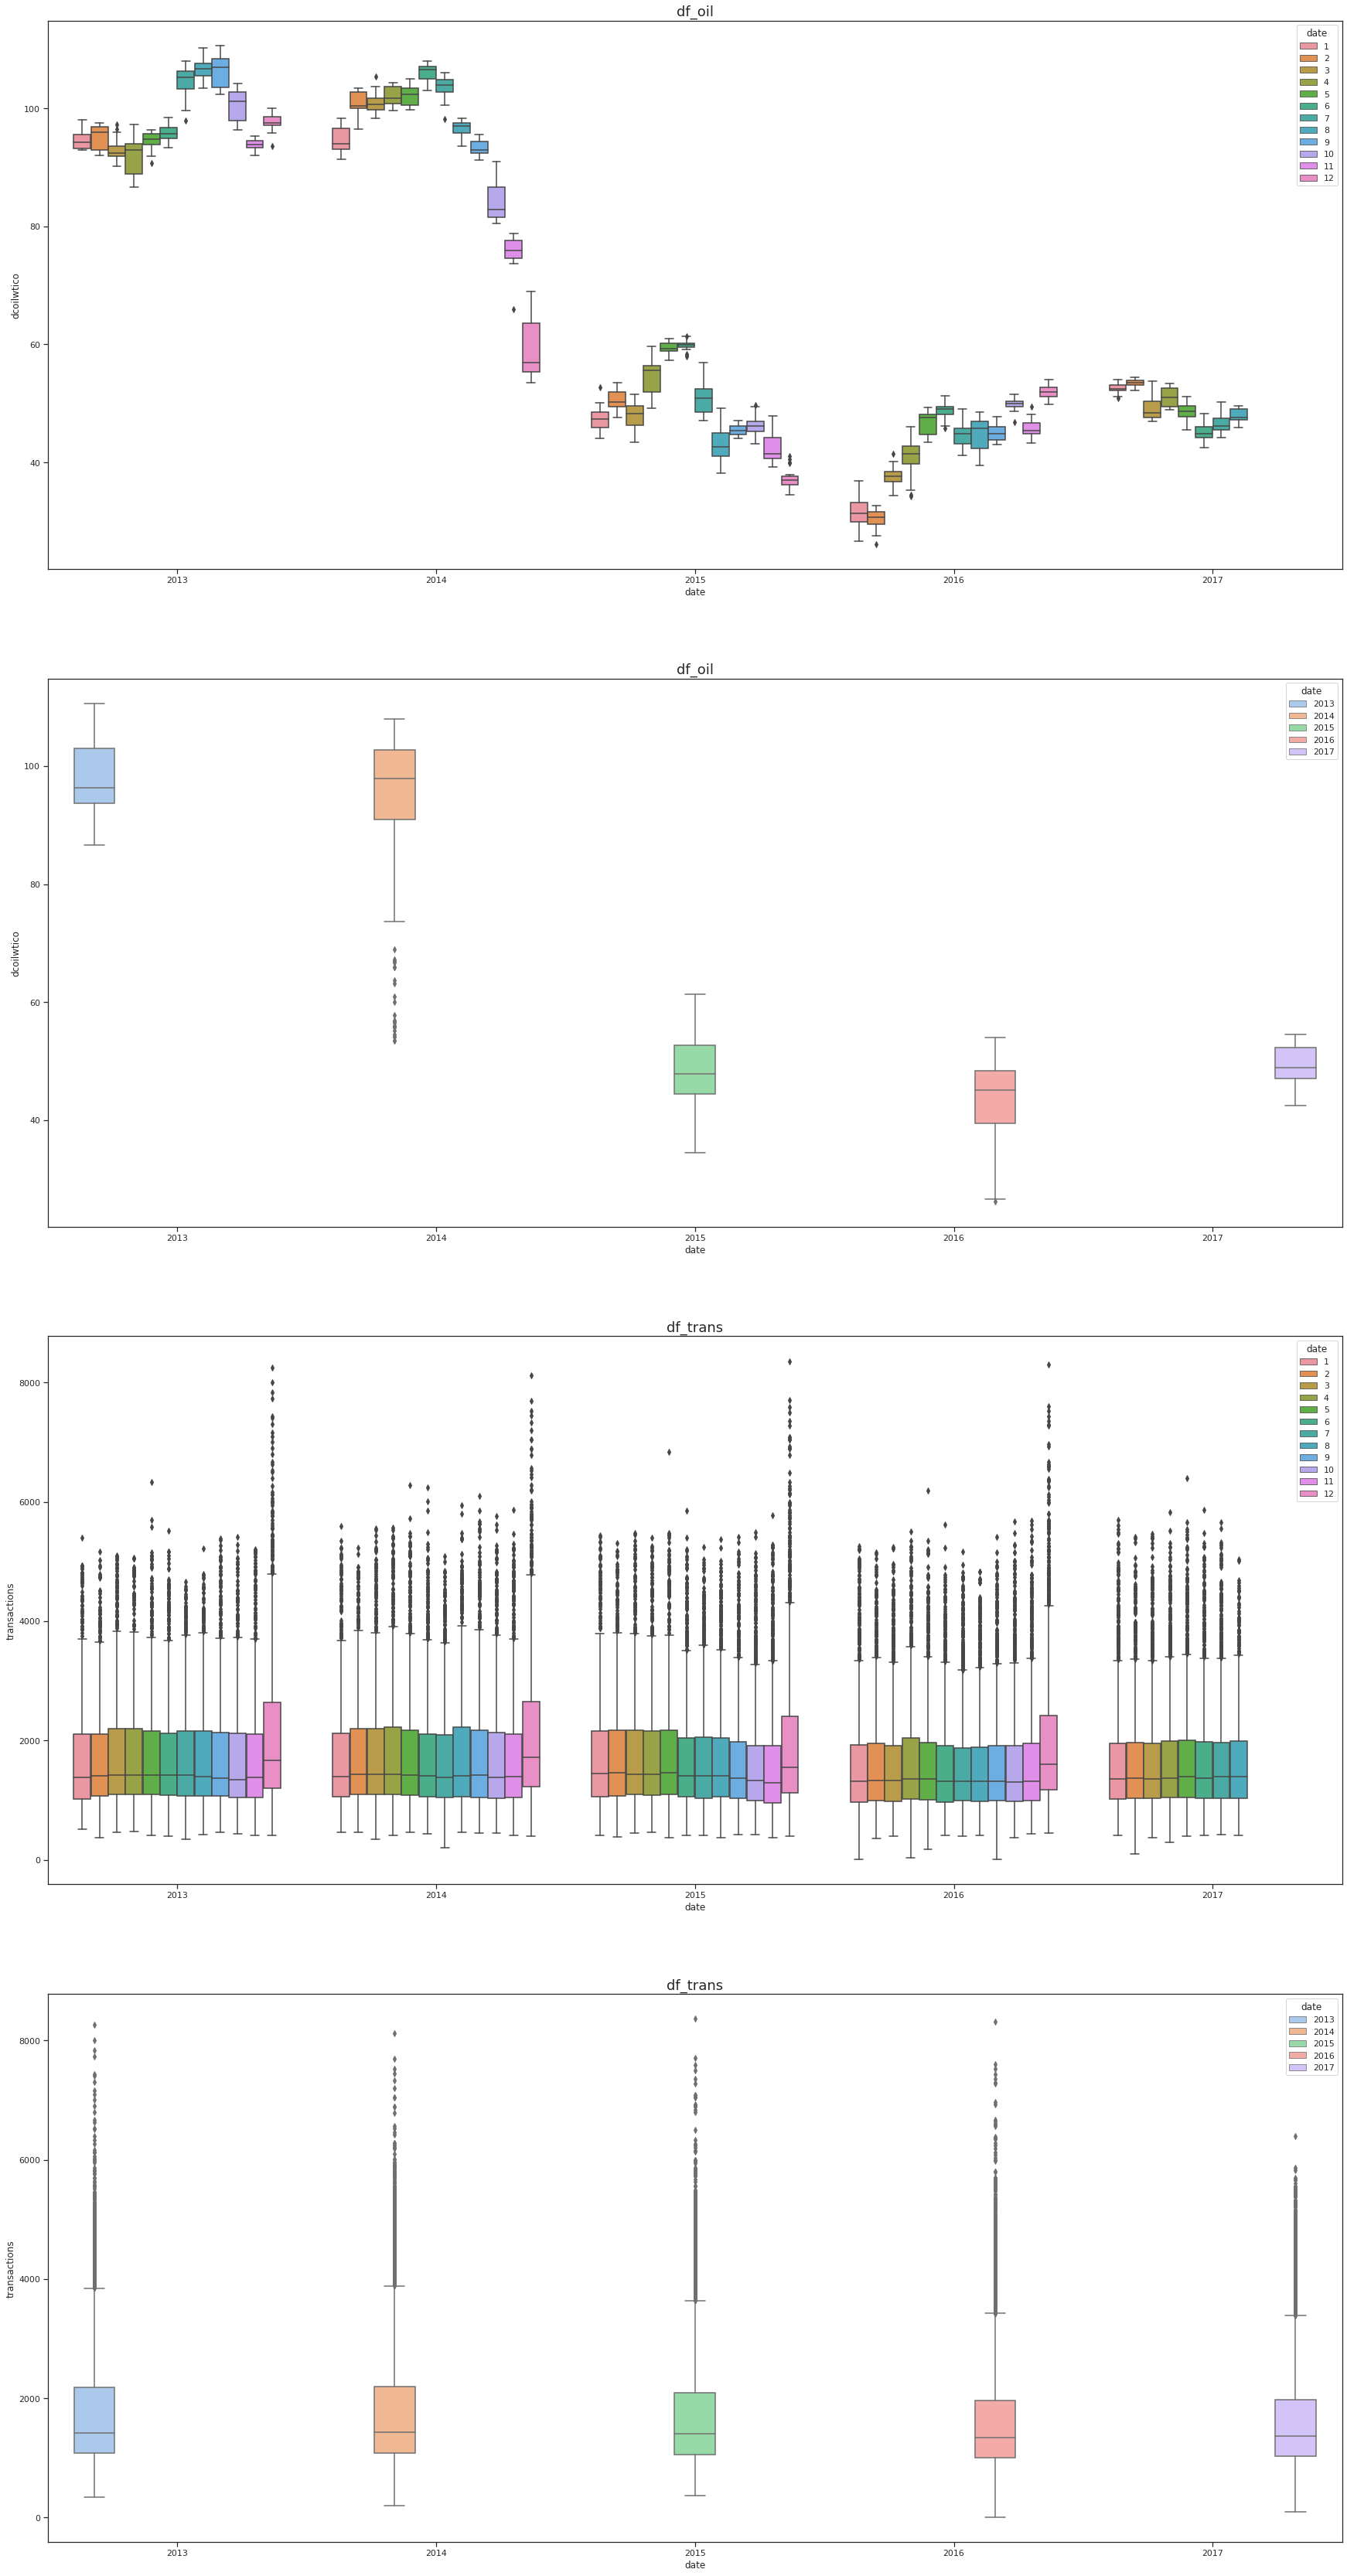

In [116]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (30,60))

# oil : month, year 별 boxplot
plot_boxplot("pastel", df_oil['date'].dt.year, df_oil['dcoilwtico'],df_oil['date'].dt.month, axes[0], "df_oil")
plot_boxplot("pastel", df_oil['date'].dt.year, df_oil['dcoilwtico'],df_oil['date'].dt.year,  axes[1], "df_oil")

# transaction : month, year별 boxplot
plot_boxplot("pastel", df_transaction['date'].dt.year, df_transaction['transactions'],df_transaction['date'].dt.month, axes[2], "df_trans")
plot_boxplot("pastel", df_transaction['date'].dt.year, df_transaction['transactions'],df_transaction['date'].dt.year,  axes[3], "df_trans")

#### 2.5 trend : moving average

- 시계열에서 `trend`는 계열 평균의 지속적이고 장기적인 변화를 나타낸다. trend는 계열에서 가장 느리게 움직이는 부분으로 가장 큰 중요도를 나타내는 부분이다. 제품 판매의 시계열에서 증가 추세는 해마다 제품에 대해 더 많은 사람들이 알게 됨에 따라 시장 확장의 효과일 수 있다.
    - 제품별로 따로 봐야하지 않을까
- 시계열에 어떤 종류의 trend가 있는지 확인하기 위해 `moving average plot(이동평균플롯)`을 사용할 수 잇다. 시계열의 이동 평균을 계산하기 위해 (미리) 정의된 너비스의 슬라이딩 차 내에서 값의 평균을 계산한다. 그래프의 각 점은 양쪽의 창에 속하는 계열의 모든 값의 평균을 나타낸다. 아이디어는 시리즈의 모든 단기 변동을 완화하여 장기적인 trend(추세)만 남도록 하는 것이다.

##### pandas.series.rolling
- `rolling(window, min_periods = None, freq= None, center=False, win_type = None, on = None, closed = None)`
- pandas의 이동평균 계산 함수
- options
    - window : 몇 개씩 연산할 것인지
    - min_periods : 최소 데이터 수, 이 아래의 데이터 수가 존재할 경우 Nan값 출력
    - center : 중간 지점을 기준으로 이동평균값을 계산
- output.mean() : 평균값을 출력

In [117]:
# make moving average plot function
def plot_moving_average(df, key, freq, col, window, min_periods, ax, title):
    df_grouped = grouped(df, key, freq, col)
    moving_average = df_grouped['mean'].rolling(window = window, center = True, min_periods=min_periods).mean()
    ax = df_grouped['mean'].plot(color = '0.75', linestyle = 'dashdot', ax=ax)
    ax = moving_average.plot(linewidth = 3, color = 'g', ax=ax)
    ax.set_title(title, fontsize = 18)

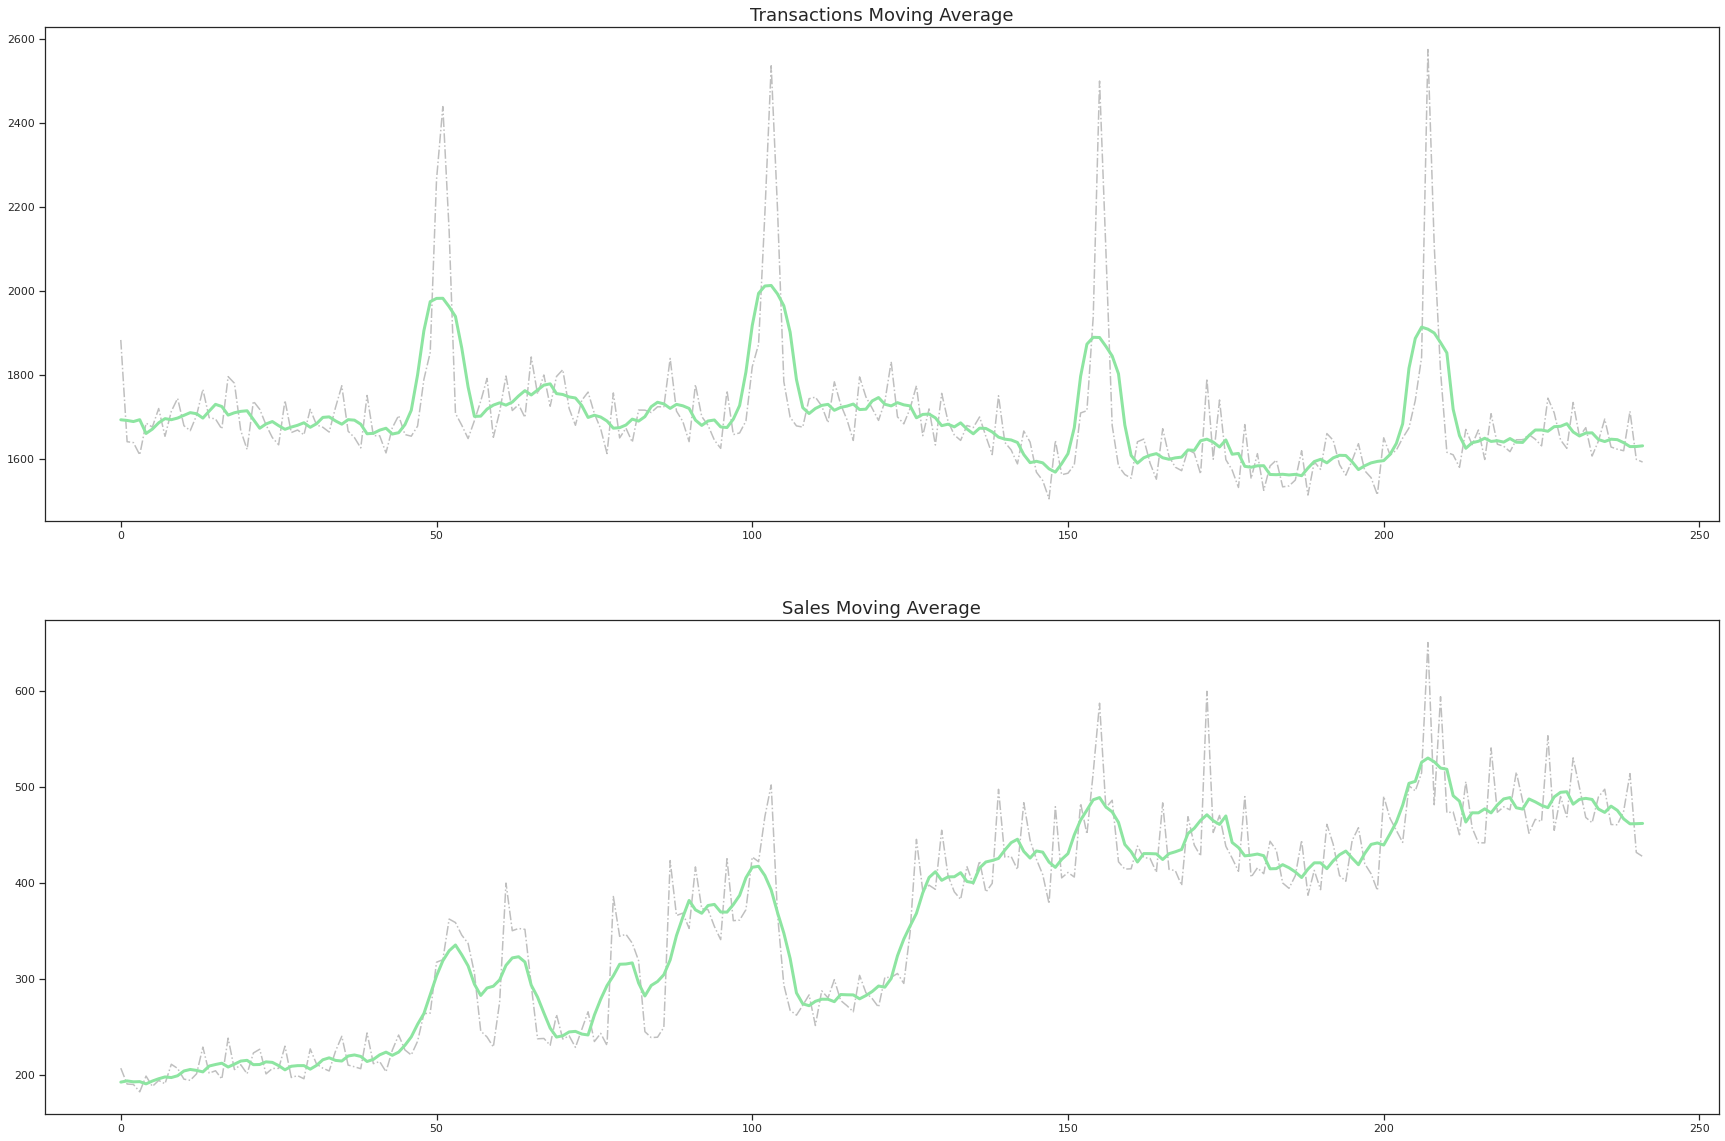

In [118]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (30,20))
plot_moving_average(df_transaction, 'date', 'W', 'transactions', 7, 4, axes[0], 'Transactions Moving Average')
plot_moving_average(df_train, 'date', 'W', 'sales', 7, 4, axes[1], 'Sales Moving Average')
plt.show()

#### 2.6 trend. forecasting trend
- `DeterministicProcess`라 불리는 `statsmodels`을 이용한다.
- 이를 이용하면 몇몇 까다로운 실패 사례를 피할 수 있다.
    - some tricky failure cases that can arise with time series and linear regression.
    - 어떤 걸 뜻하는 건지는 잘 모르겠음
- order 매개변수는 차수를 뜻한다. (1: linear, 2:quadratic, 3: cubic)

##### statsmodels.tsa.deterministic.DeterministicProcess
- `DeterministicProcess(index, *, period = None, constant = False, order=0, seasonal=False, fourier=0, additional_terms = (), drop = False)`
- parameter
    - index : "in-sample"의 index가 된다.
    - constant : 상수항을 넣을지 말지
    - period : `seasonal`, `fourier` 성분의 기간이다. seasonal dummies의 경우 제공되지 않으면 index에서 freq를 읽어온다.
    - order : 차수
    - seasonal : seasonal dummies를 넣을건지 안 넣을 건지
    - fourier: fourier term의 차수
    - additional_terms : 
    - drop : 완벽한 공선성을 확인하고 선형 종속 항을 삭제
    
 - method
     - in_sample() : X를 반환
     - out_of_sample(steps[,forcast_index]) : 샘플 외 예측에 대한 deterministic trends 반환
     

In [119]:
def plot_deterministic_process(df, key, freq, col, ax1, title1, ax2, title2):
    df_grouped = grouped(df, key, freq, col)
    df_grouped['date'] = pd.to_datetime(df_grouped['date'], format = "%Y-%m-%d")
    dp = DeterministicProcess(index = df_grouped['date'], constant = True, order=1, drop = True)
    dp.index.freq = freq
    
    # 과거 데이터 trend
    # 'in_sample' 은 date에 주어진 index argument를 반환한다.
    X1 = dp.in_sample()
    y1 = df_grouped['mean'] # target
    y1.index = X1.index
    
    # constant = True로 절편을 생성해주었기 때문에 선형회귀 모형에서 제외시켜준다.
    model = LinearRegression(fit_intercept = False)
    model.fit(X1, y1)
    y1_pred = pd.Series(model.predict(X1), index = X1.index)
    ax1 = y1.plot(linestyle = 'dashed', label='mean', color = '0.75', ax = ax1, use_index=True)
    ax1 = y1_pred.plot(linewidth =3, label = "Trend", color = 'b', ax =ax1, use_index = True)
    ax1.set_title(title1, fontsize = 18)
    _ = ax1.legend()
    
    # forecast trend for future 30 steps
    steps = 30
    X2 = dp.out_of_sample(steps = steps)
    y2_fore = pd.Series(model.predict(X2), index = X2.index) # X2에 대해 예측
    y2_fore.head()
    ax2 = y1.plot(linestyle = 'dashed', label='mean', color = '0.75', ax = ax2, use_index=True)
    ax2 = y1_pred.plot(linewidth=3, label="Trend", color = 'b', ax =ax2, use_index = True)
    ax2 = y2_fore.plot(linewidth=3, label="Predicted Trend", color = 'r', ax = ax2, use_index = True)
    ax2.set_title(title2, fontsize = 18)
    _ = ax2.legend()
    

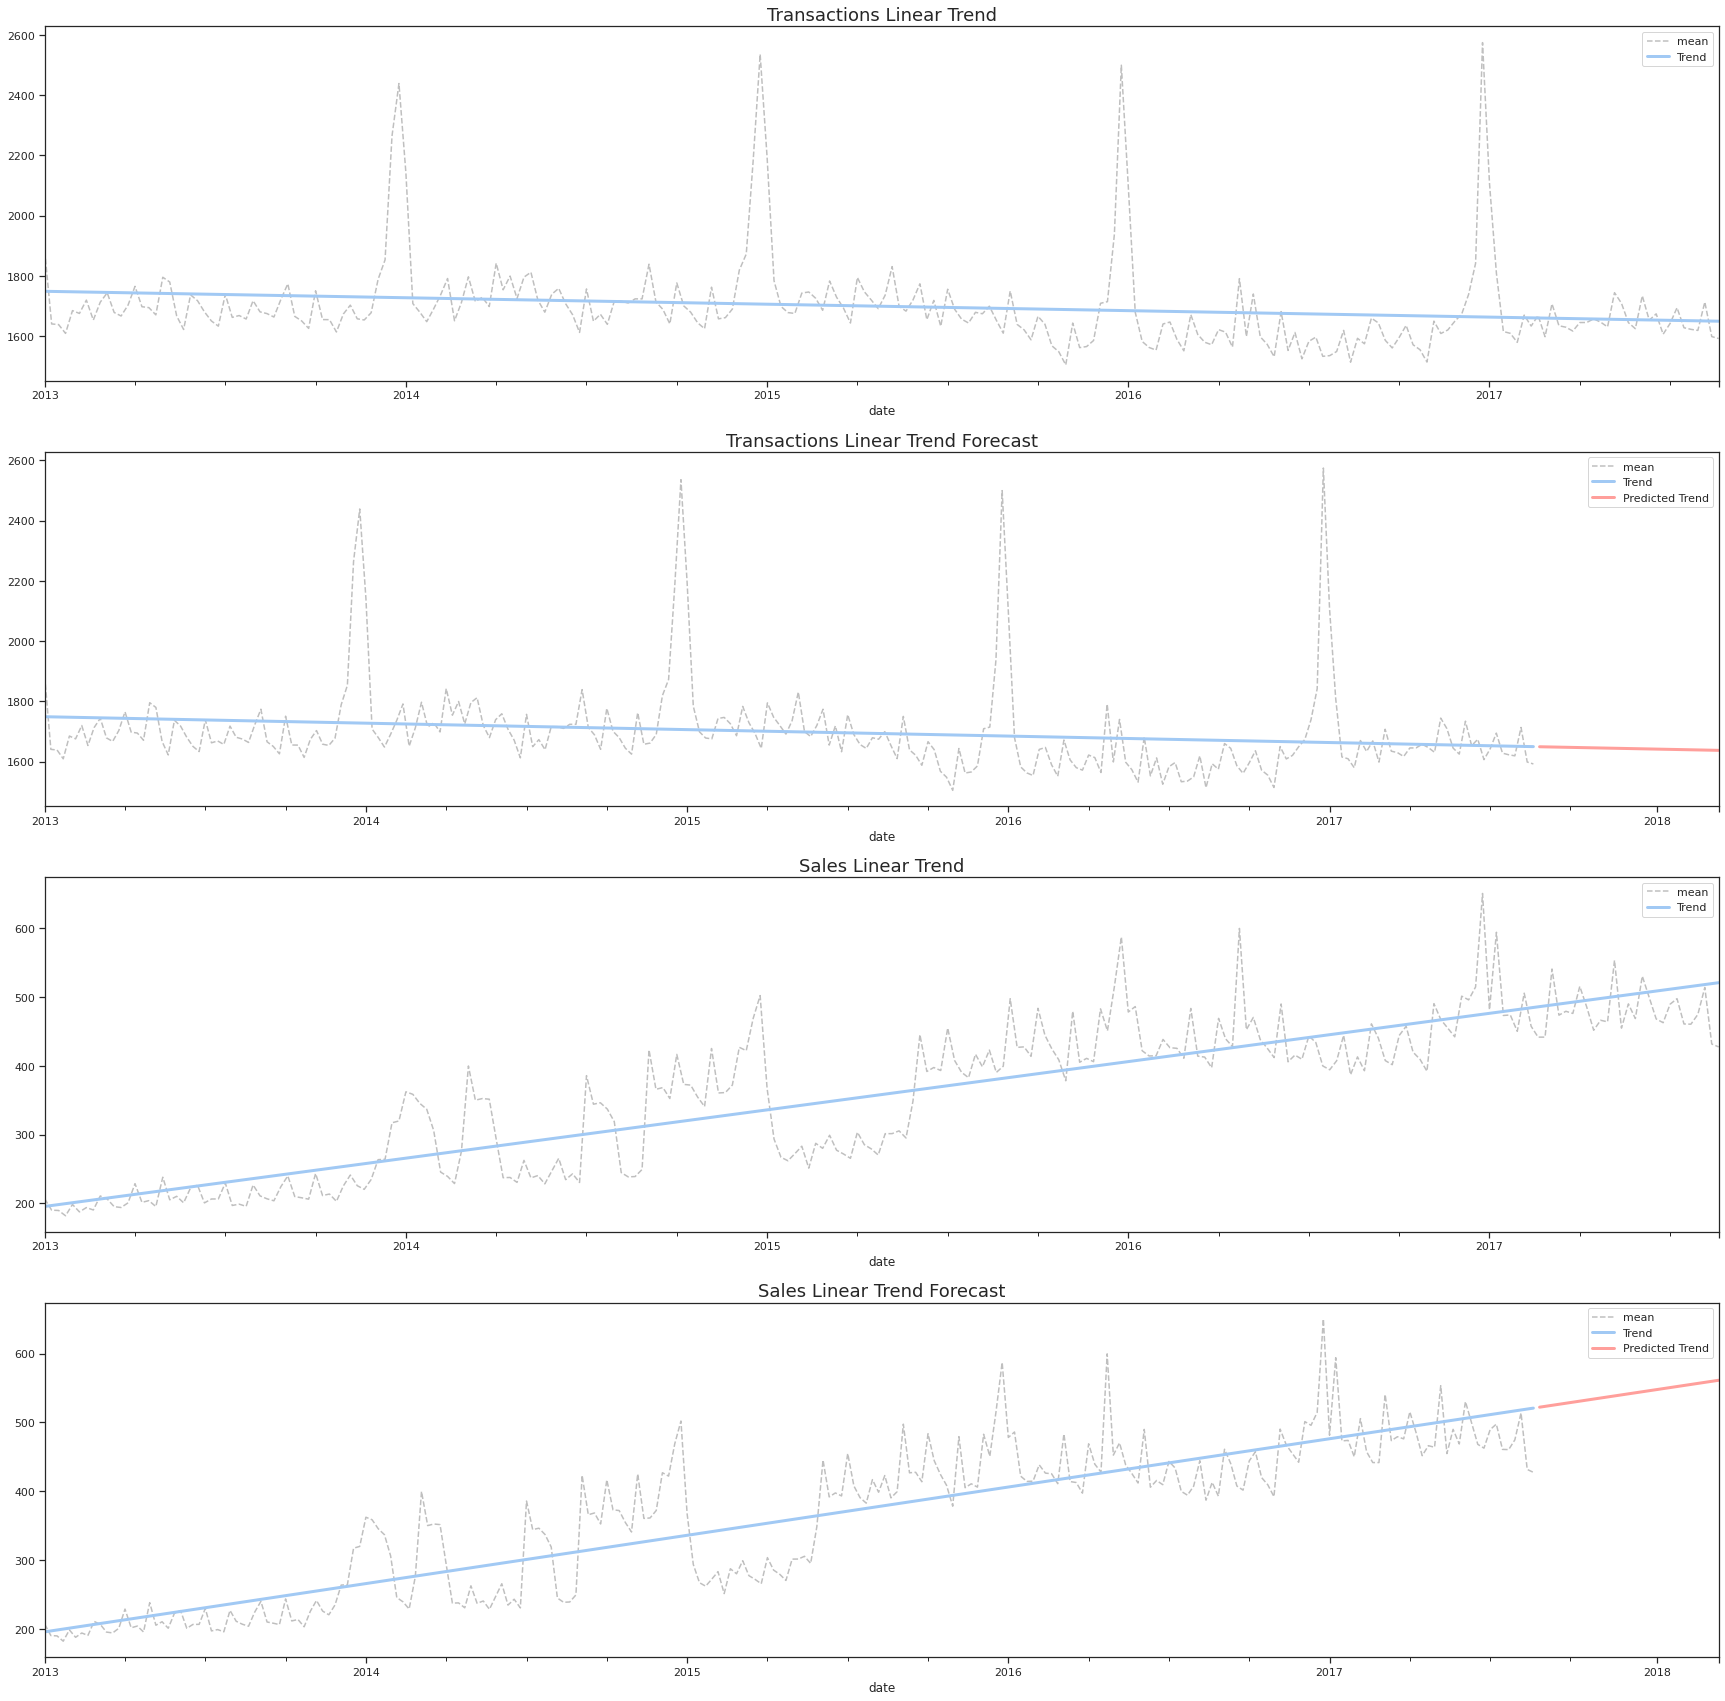

In [120]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,30))
plot_deterministic_process(df_transaction, 'date', 'W', 'transactions', 
                           axes[0], "Transactions Linear Trend",  
                           axes[1], "Transactions Linear Trend Forecast")
plot_deterministic_process(df_train, 'date', 'W', 'sales', 
                           axes[2], "Sales Linear Trend", 
                           axes[3], "Sales Linear Trend Forecast")
plt.show()

#### 2.7 Seasonality
- 시계열은 시계열 평균에 규칙적이고 주기적인 변화가 있을 때마다 `seasonality(계절성)`을 나타낸다. 계절성은 일반적으로 시계(하루)와 달력(1년)을 따른다. 종종 날짜 및 시간을 둘러싼 사회적 행동의 관습에의해 주도된다. `moving average plot(이동 평균 플롯)`을 사용하여 계열의 추세를 찾은 것처럼 '`seasonal plot(계절 플롯)`을 사용하여 계절 패턴을 찾을 수 있다. 

##### nunique() : 고유값의 수를 출력

In [121]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(x=X[freq], 
                      y=X[y],
                      ax=ax, 
                      hue=X[period],
                      palette=palette, 
                      legend=False)
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(name, 
                    xy=(1, y_), 
                    xytext=(6, 0), 
                    color=line.get_color(), 
                    xycoords=ax.get_yaxis_transform(), 
                    textcoords="offset points", 
                    size=14, 
                    va="center")
    return ax

##### 스펙트럼 분석
- https://rfriend.tistory.com/690

In [122]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(ts, fs=fs, detrend=detrend, window="boxcar", scaling='spectrum')
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(["Annual (1)", "Semiannual (2)", "Quarterly (4)", 
                        "Bimonthly (6)", "Monthly (12)", "Biweekly (26)", 
                        "Weekly (52)", "Semiweekly (104)"], rotation=30)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [123]:
def seasonality(df, key, freq, col):
    df_grouped = grouped(df, key, freq, col)
    df_grouped['date'] = pd.to_datetime(df_grouped['date'], format = "%Y-%m-%d")
    df_grouped.index = df_grouped['date'] 
    df_grouped = df_grouped.drop(columns=['date'])
    df_grouped.index.freq = freq # manually set the frequency of the index
    
    X = df_grouped.copy()
    X.index = pd.to_datetime(X.index, format = "%Y-%m-%d") 
    X.index.freq = freq 
    # days within a week
    X["day"] = X.index.dayofweek   # the x-axis (freq)
    X["week"] = pd.Int64Index(X.index.isocalendar().week)  # the seasonal period (period)
    # days within a year
    X["dayofyear"] = X.index.dayofyear
    X["year"] = X.index.year
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 30))
    seasonal_plot(X, y='mean', period="week", freq="day", ax=ax0)
    seasonal_plot(X, y='mean', period="year", freq="dayofyear", ax=ax1)
    X_new = (X['mean'].copy()).dropna()
    plot_periodogram(X_new, ax=ax2)

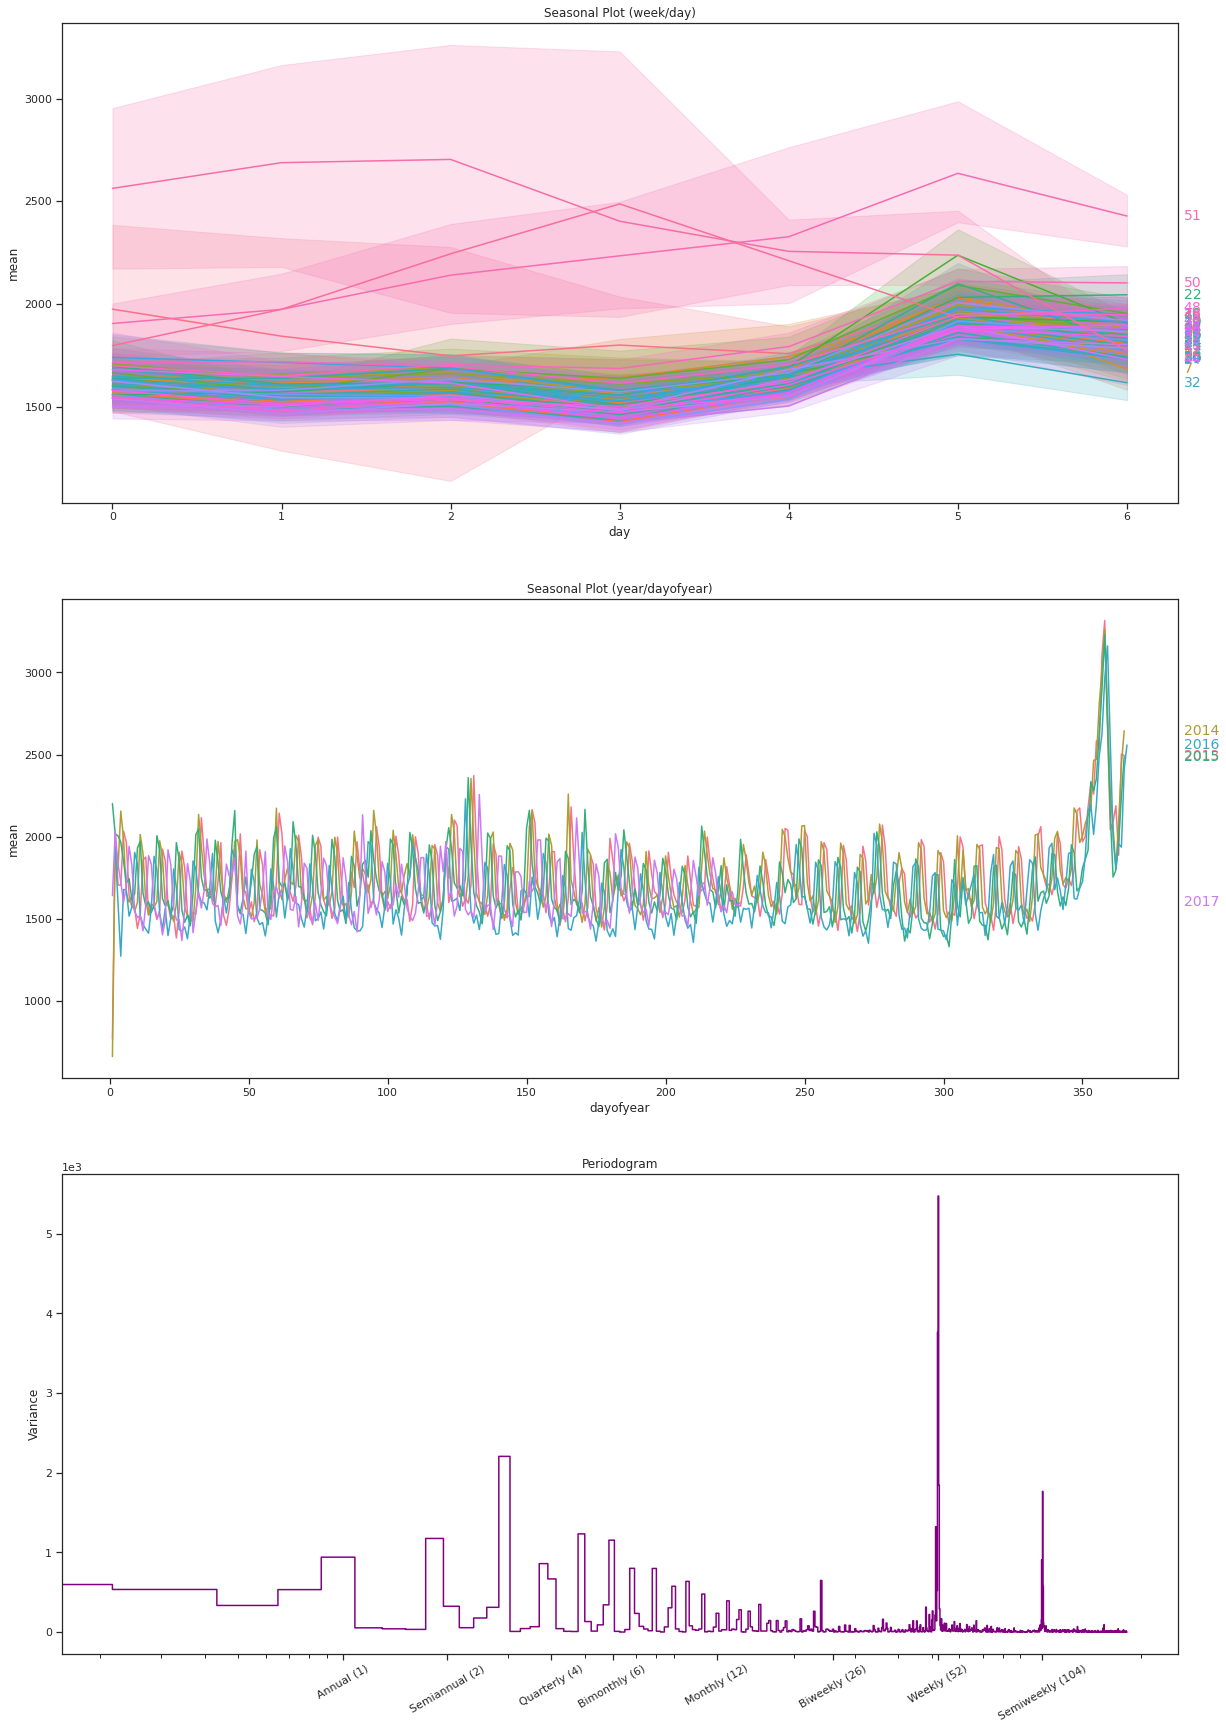

In [124]:
 seasonality(df_transaction, 'date', 'D', 'transactions')

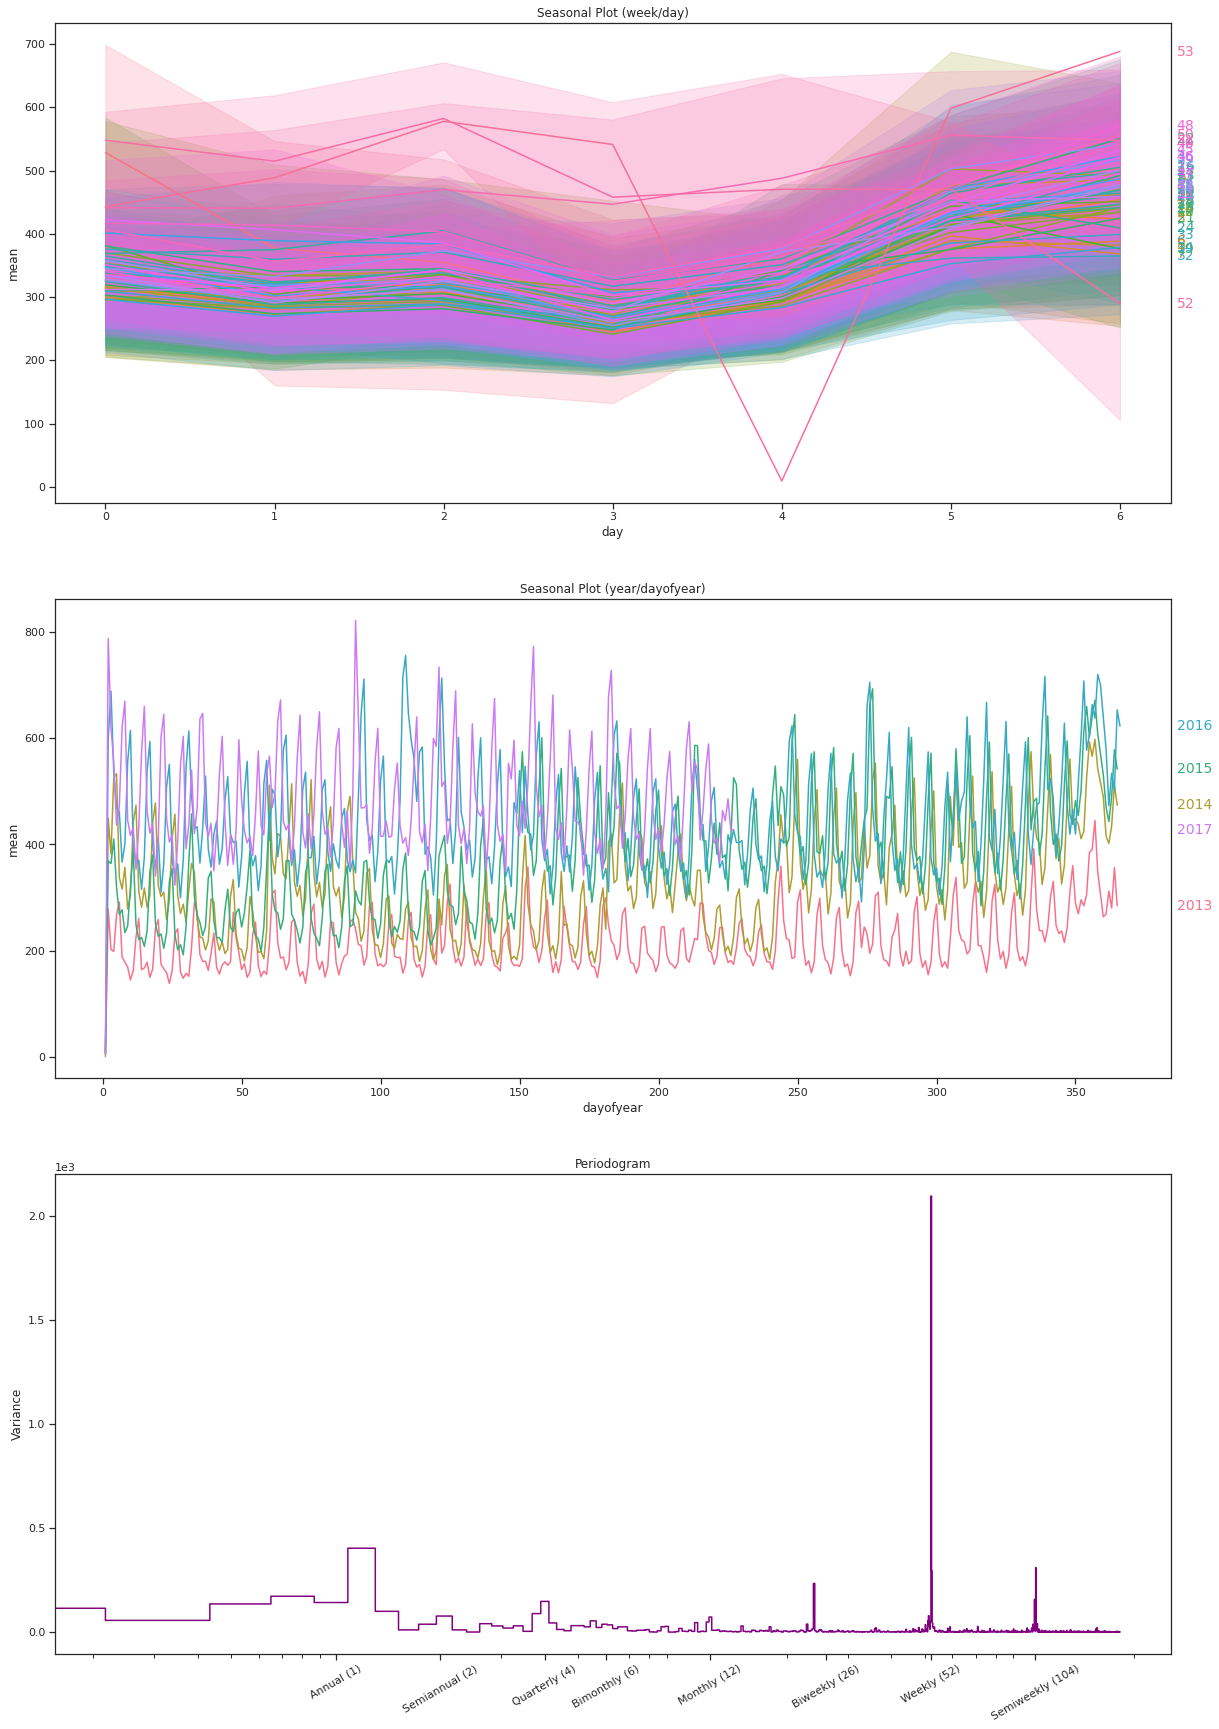

In [125]:
seasonality(df_train, 'date', 'D', 'sales')

- Trend에서 처럼 `DeterministicProcess`를 사용하여 계절성을 예측할 수 있다.

##### CalendarFourier(freq, order)
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.deterministic.CalendarFourier.html
- Fourier series deterministic terms based on calendar time

In [126]:
# CalendarFourier 예시
base = pd.Timestamp("2020-1-1")
gen = np.random.default_rng()
gaps = np.cumsum(gen.integers(0, 1800, size=1000))
times = [base + pd.Timedelta(gap, unit="s") for gap in gaps]
index = pd.DatetimeIndex(pd.to_datetime(times))

cal_fourier_gen = CalendarFourier(freq = "A", order = 10)
cal_fourier_gen.in_sample(index).head()

,"sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(2,freq=A-DEC)","cos(2,freq=A-DEC)","sin(3,freq=A-DEC)","cos(3,freq=A-DEC)","sin(4,freq=A-DEC)","cos(4,freq=A-DEC)","sin(5,freq=A-DEC)","cos(5,freq=A-DEC)","sin(6,freq=A-DEC)","cos(6,freq=A-DEC)","sin(7,freq=A-DEC)","cos(7,freq=A-DEC)","sin(8,freq=A-DEC)","cos(8,freq=A-DEC)","sin(9,freq=A-DEC)","cos(9,freq=A-DEC)","sin(10,freq=A-DEC)","cos(10,freq=A-DEC)"
2020-01-01 00:22:12,0.000265,1.0,0.000529,1.000000,0.000794,1.000000,0.001059,0.999999,0.001323,0.999999,0.001588,0.999999,0.001853,0.999998,0.002117,0.999998,0.002382,0.999997,0.002647,0.999996
2020-01-01 00:23:11,0.000276,1.0,0.000553,1.000000,0.000829,1.000000,0.001106,0.999999,0.001382,0.999999,0.001658,0.999999,0.001935,0.999998,0.002211,0.999998,0.002487,0.999997,0.002764,0.999996
2020-01-01 00:30:28,0.000363,1.0,0.000726,1.000000,0.001090,0.999999,0.001453,0.999999,0.001816,0.999998,0.002179,0.999998,0.002542,0.999997,0.002906,0.999996,0.003269,0.999995,0.003632,0.999993
2020-01-01 00:59:17,0.000707,1.0,0.001414,0.999999,0.002120,0.999998,0.002827,0.999996,0.003534,0.999994,0.004241,0.999991,0.004947,0.999988,0.005654,0.999984,0.006361,0.999980,0.007067,0.999975
2020-01-01 01:02:37,0.000746,1.0,0.001493,0.999999,0.002239,0.999997,0.002986,0.999996,0.003732,0.999993,0.004479,0.999990,0.005225,0.999986,0.005972,0.999982,0.006718,0.999977,0.007465,0.999972


In [127]:
# seasonality를 예측
def predict_seasonality(df, key, freq, col, ax1, title1):
    fourier = CalendarFourier(freq = "A", order = 10) # 10 sin/cos paris for "A"nnual seasonality
    df_grouped = grouped(df, key, freq, col)
    df_grouped['date'] = pd.to_datetime(df_grouped['date'], format='%Y-%m-%d')
    df_grouped['date'].freq = freq
    dp = DeterministicProcess(index = df_grouped['date'],
                             constant = True, # 상수항
                             order = 1, # 1차항
                             period = None,
                             seasonal = True, # seasonal
                             additional_terms = [fourier],
                             drop = True)
    dp.index.freq = freq
    
    # 'in_sample'은`'index'에 대해 feature를 생성해준다.
    X1 = dp.in_sample()
    y1 = df_grouped['mean']
    y1.index = X1.index
    
    # DeterministicProcess에서 const 항을 추가했기 때문에 여기에서는 제거
    model = LinearRegression(fit_intercept = False)
    model.fit(X1, y1)
    y1_pred = pd.Series(model.predict(X1), index = X1.index)
    X1_fore = dp.out_of_sample(steps = 90)
    y1_fore = pd.Series(model.predict(X1_fore), index = X1_fore.index)
    
    ax1 = y1.plot(linestyle = 'dashed', style = '.', label = 'init mean values', color = '0.4', ax= ax1, use_index = True)
    ax1 = y1_pred.plot(linewidth = 3, label = "Seasonal", color = 'b', ax=ax1, use_index = True)
    ax1 = y1_fore.plot(linewidth = 3, label = "Seasonal Forecast", color = 'r', ax = ax1, use_index = True)
    ax1.set_title(title1, fontsize = 18)
    _ = ax1.legend()

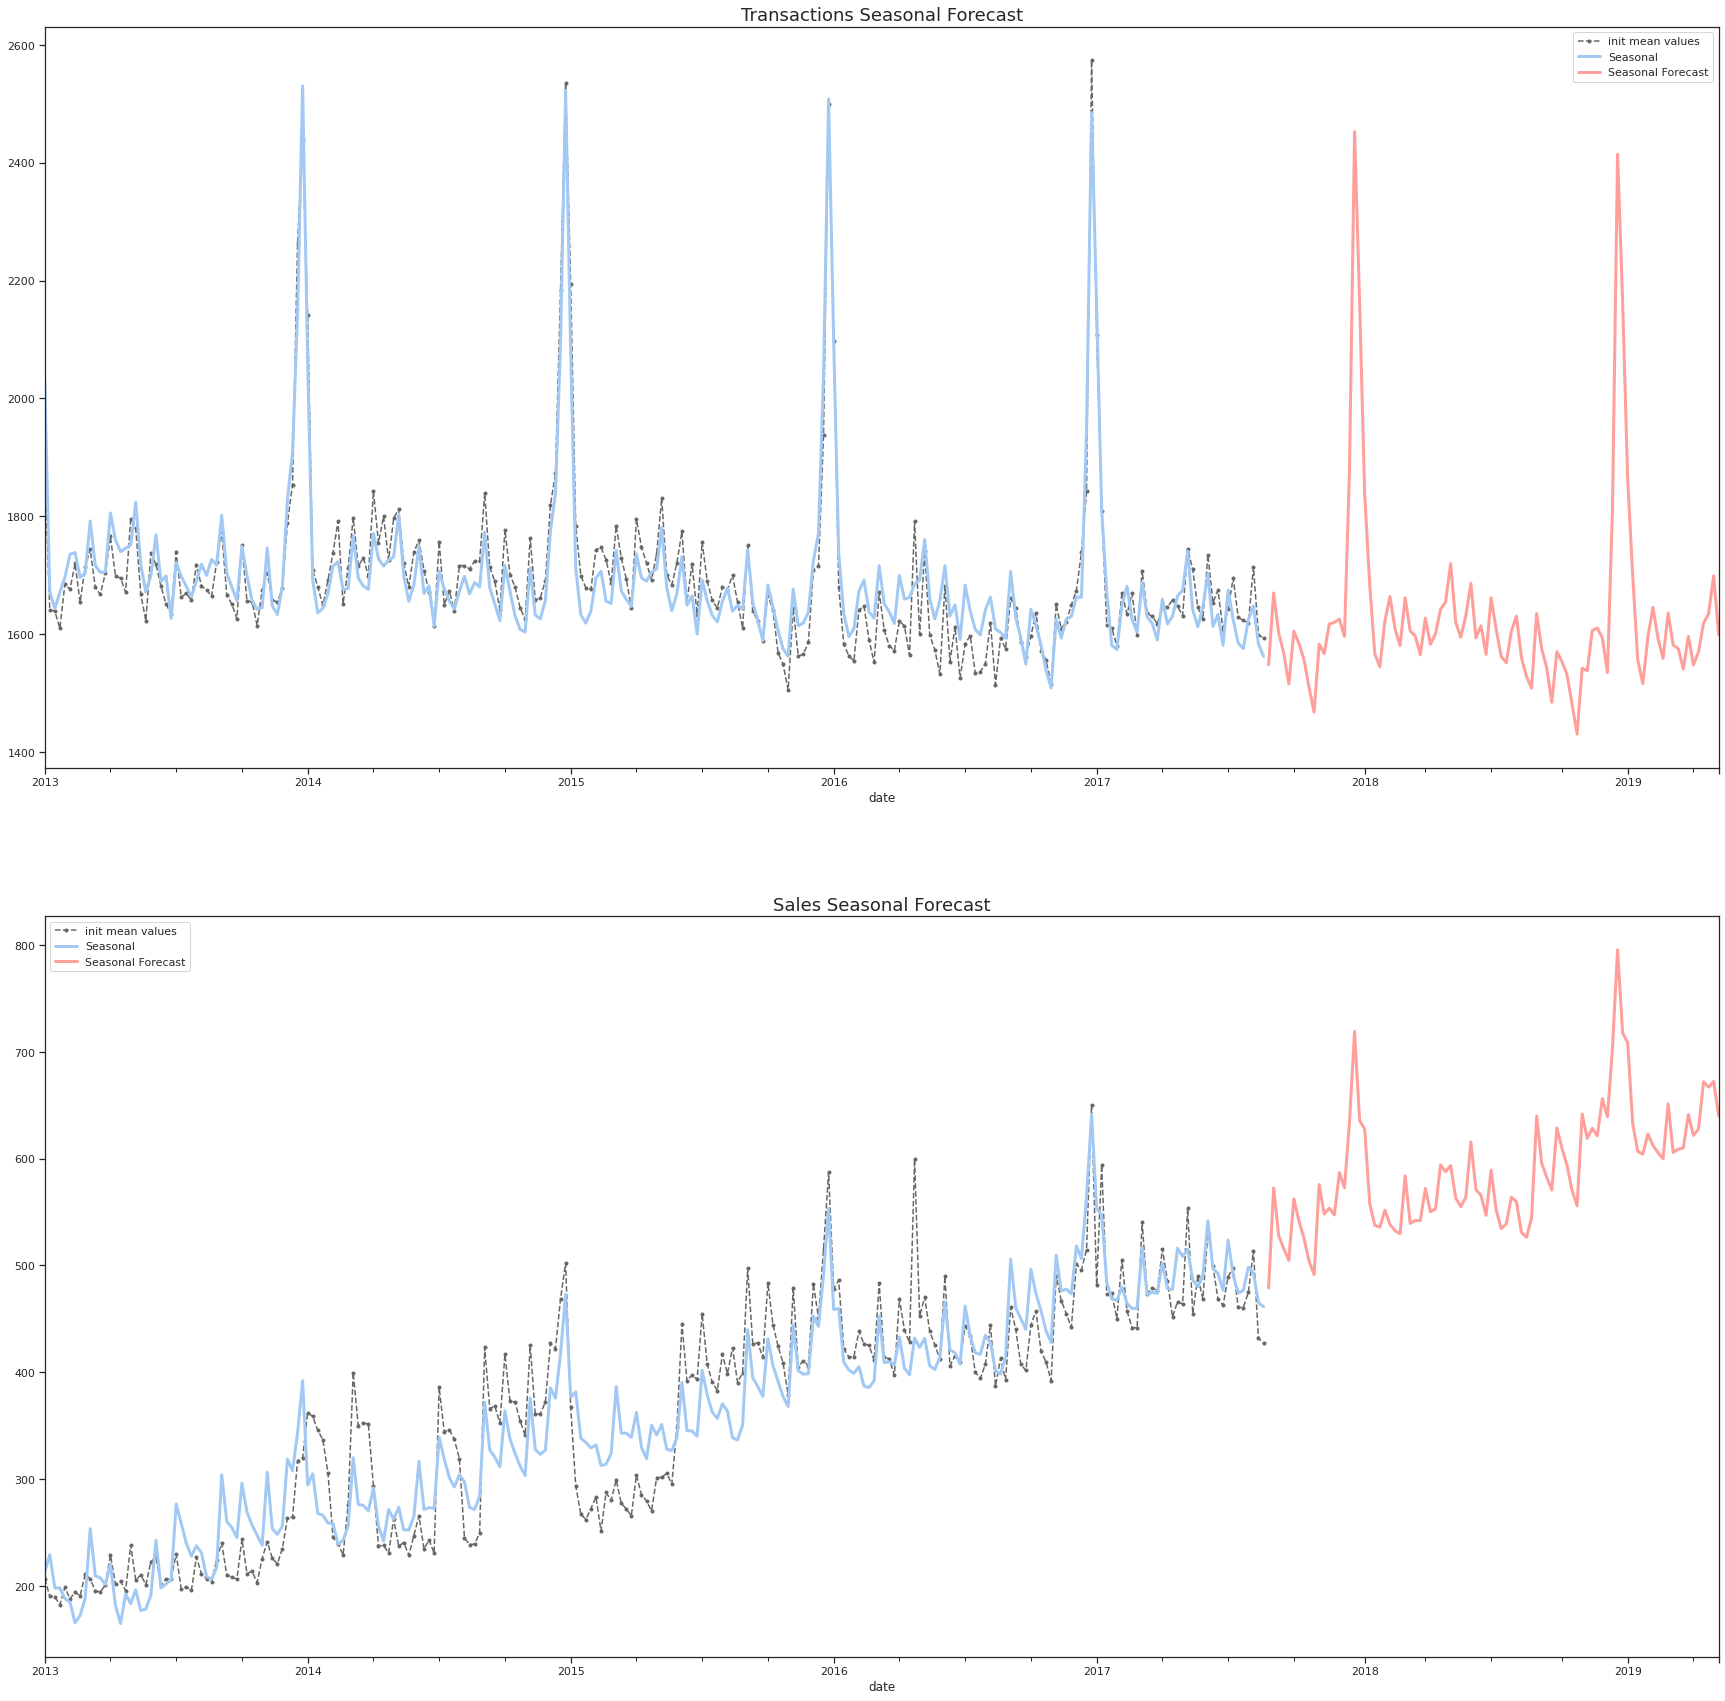

In [128]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,30))
predict_seasonality(df_transaction, 'date', 'W', 'transactions', axes[0], "Transactions Seasonal Forecast")
predict_seasonality(df_train, 'date', 'W', 'sales', axes[1], "Sales Seasonal Forecast")
plt.show()

### 3. Time Series as Features

In [129]:
store_sales = df_train.copy()
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

family_sales = (
    store_sales
    .groupby(['family', 'date'])
    .mean()
    .unstack('family')
    .loc['2017',['sales', 'onpromotion']] # 2017년에 대해서만
)

mag_sales = family_sales.loc(axis = 1)[:, "MAGAZINES"]

In [130]:
store_sales.head()

id  sales  onpromotion
store_nbr family     date                                
1         AUTOMOTIVE 2013-01-01     0    0.0            0
                     2013-01-02  1782    2.0            0
                     2013-01-03  3564    3.0            0
                     2013-01-04  5346    3.0            0
                     2013-01-05  7128    5.0            0

In [131]:
family_sales.head()

sales                                              \
family     AUTOMOTIVE BABY CARE     BEAUTY    BEVERAGES     BOOKS   
date                                                                
2017-01-01   0.092593  0.037037   0.055556    74.222222  0.000000   
2017-01-02  11.481481  0.259259  11.648148  6208.055556  0.481481   
2017-01-03   8.296296  0.296296   7.185185  4507.814815  0.814815   
2017-01-04   6.833333  0.333333   6.888889  3911.833333  0.759259   
2017-01-05   6.333333  0.351852   5.925926  3258.796296  0.407407   

                                                                           \
family     BREAD/BAKERY CELEBRATION     CLEANING        DAIRY        DELI   
date                                                                        
2017-01-01     9.084685    0.129630     7.500000    11.518519    3.629167   
2017-01-02   844.836296   14.203704  2233.648148  1545.000000  539.114833   
2017-01-03   665.124111   10.629630  1711.907407  1204.203704  404.300074   
2017-01-04   594.160611   11.185185  1508.037037  1107.796296  309.397685   
2017-01-05   495.511611   12.444444  1241.833333   829.277778  260.776500   

            ... onpromotion                                       \
family      ...   MAGAZINES     MEATS PERSONAL CARE PET SUPPLIES   
date        ...                                                    
2017-01-01  ...         0.0  0.018519      0.111111     0.018519   
2017-01-02  ...         0.0  0.462963     10.592593     0.537037   
2017-01-03  ...         0.0  0.481481      9.722222     0.444444   
2017-01-04  ...         0.0  0.370370     12.037037     0.444444   
2017-01-05  ...         0.0  8.981481      5.666667     0.000000   

                                                                         \
family     PLAYERS AND ELECTRONICS   POULTRY PREPARED FOODS     PRODUCE   
date                                                                      
2017-01-01                     0.0  0.000000       0.037037    0.129630   
2017-01-02                     0.0  0.259259       1.166667    5.629630   
2017-01-03                     0.0  0.388889       1.351852   56.296296   
2017-01-04                     0.0  0.296296       5.444444  101.277778   
2017-01-05                     0.0  0.296296       0.907407    5.018519   

                                                 
family     SCHOOL AND OFFICE SUPPLIES   SEAFOOD  
date                                             
2017-01-01                        0.0  0.000000  
2017-01-02                        0.0  0.407407  
2017-01-03                        0.0  0.407407  
2017-01-04                        0.0  0.333333  
2017-01-05                        0.0  0.444444  

[5 rows x 66 columns]

In [132]:
mag_sales.head()

,sales,onpromotion
family,MAGAZINES,MAGAZINES
date,,
2017-01-01,0.074074,0.0
2017-01-02,7.777778,0.0
2017-01-03,3.500000,0.0
2017-01-04,3.500000,0.0
2017-01-05,3.203704,0.0


Text(0.5, 1.0, 'Magazine Sales (deseasonalized)')

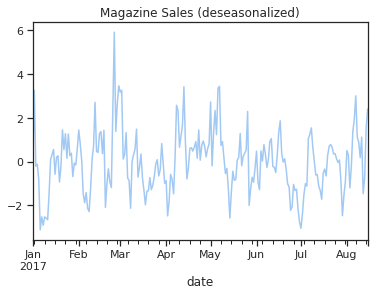

In [133]:
# plot data
y = mag_sales.loc[:, 'sales'].squeeze()
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    constant = True,
    index = y.index,
    order = 1,
    seasonal = True,
    drop = True,
    additional_terms = [fourier])
X_time = dp.in_sample()
X_time['NewYearsDay'] = (X_time.index.dayofyear == 1) # 새해

model = LinearRegression(fit_intercept = False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'sales_deseasoned'

ax = y_deseason.plot()
ax.set_title("Magazine Sales (deseasonalized)")

In [134]:
X_time.head()

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)",NewYearsDay
date,,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,True
2017-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,False
2017-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649,False
2017-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758,False
2017-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869,False


#### 3.1 Lag plot
- 시계열을 지연시킴으로써 과거 값이 예측하려는 값과 같은 행에 나타날 수 있도록 할 수 있다. 즉, 지연된 계열은 직렬 종속성을 모델링하는 기능으로 유용하다. 시리즈를 예측하기 위해 y_lag_1, y_lag_2를 대상 y를 예측하는 기능으로 사용할 수 있다.

- 시계열의 `lag plot(시차 플롯)`은 시차에 대해 플롯된 값을 보여준다. 시계열의 직렬 종속성은 종종 시차 플롯을 보면 분명해진다.

- 직렬 종속성의 가장 일반적으로 사용되는 측정은 `자기 상관`으로 알려져 있으며, 이는 단순히 시계열이 시차 중 하나와 갖는 상관관계이다. 

- `부분 자기 상관`은 이전의 모든 시차를 설명하는 시차의 상관 관계, 즉 시차가 기여하는 새로운 상관 관계의 양을 알려준다. 부분 자기상관을 플로팅하면 사용할 지연 기능을 선택하는 데 도움이 될 수 있다.

In [140]:
# lag(시차), autocorrelation plots(자기 상관 플롯)
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(alpha=0.75,s=3)
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_, y=y_, scatter_kws=scatter_kws, line_kws=line_kws, lowess=True, ax=ax, **kwargs)
    at = AnchoredText(f"{corr:.2f}",prop=dict(size="large"), frameon=True, loc="upper left")
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2 + 10, nrows * 2 + 5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

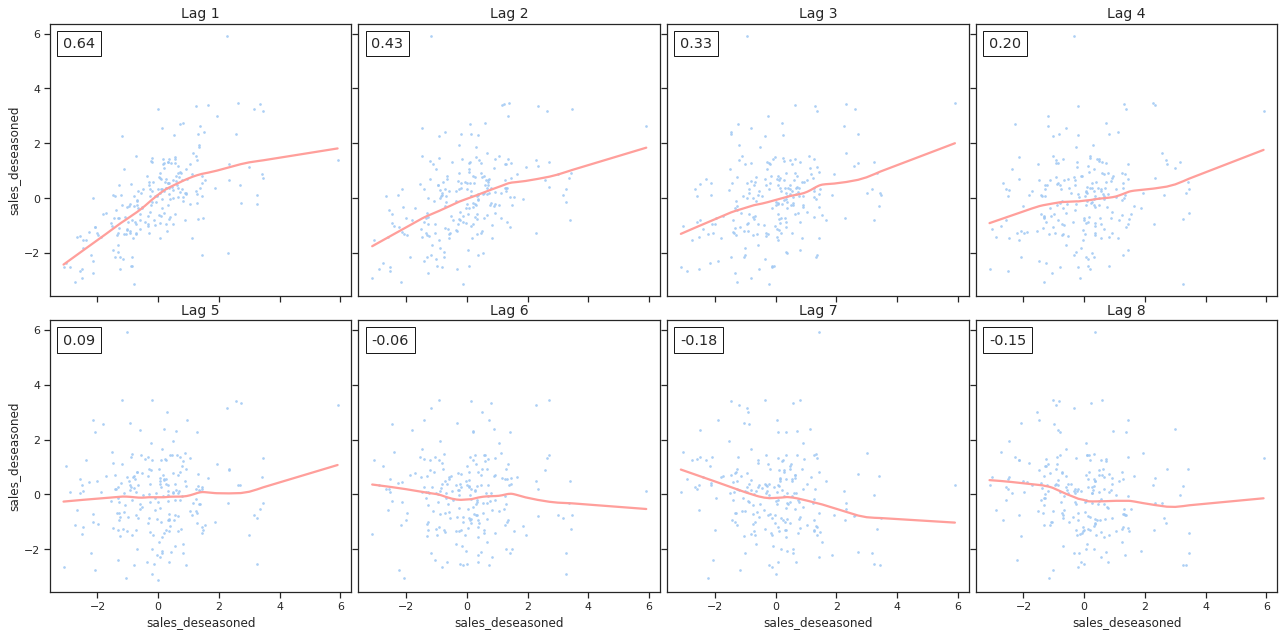

In [141]:
# y끼리
_ = plot_lags(y_deseason, lags = 8, nrows = 2)

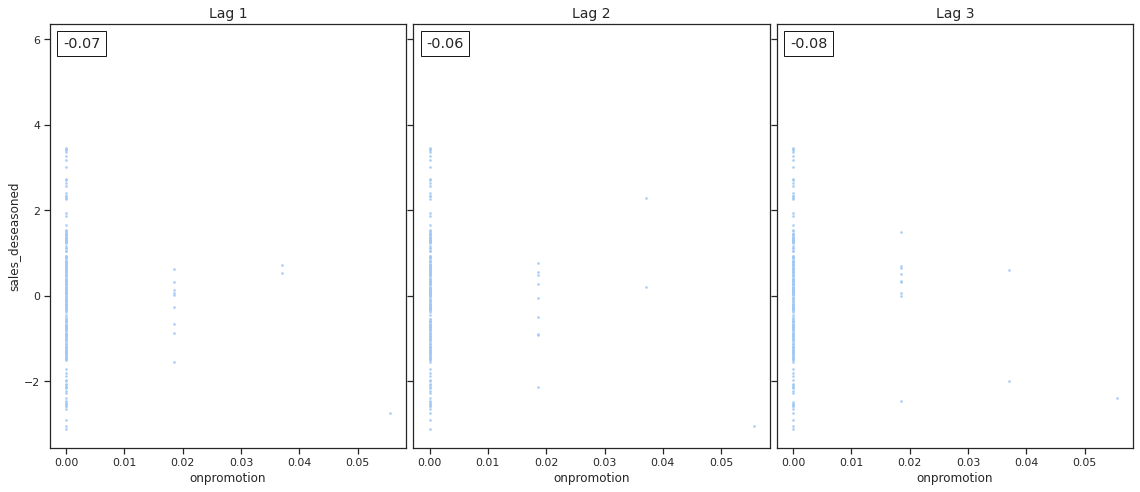

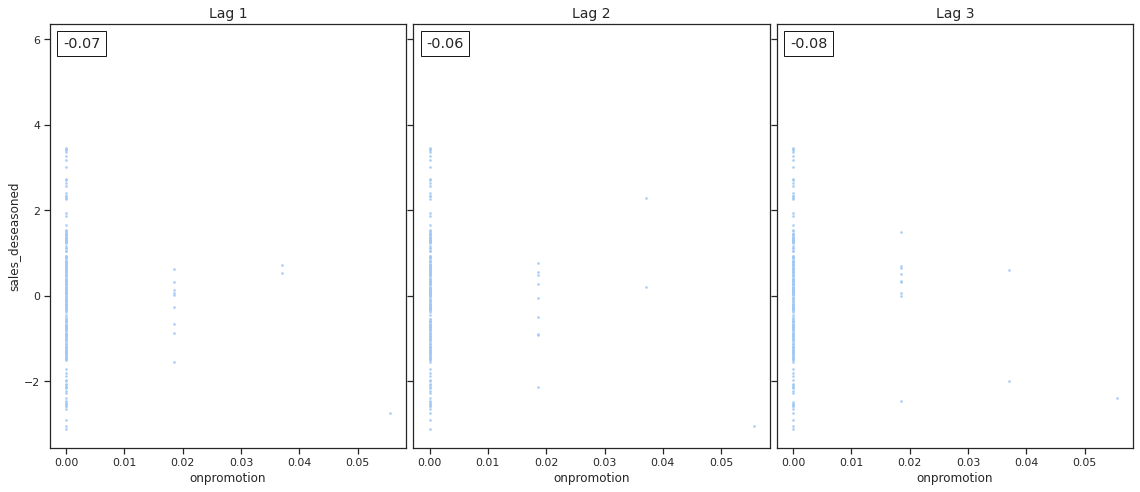

In [142]:
# 뭔가 이상
onpromotion = mag_sales.loc[:, 'onpromotion'].squeeze().rename('onpromotion')

# Drop the New Year outlier
plot_lags(x=onpromotion.iloc[1:], y=y_deseason.iloc[1:], lags=3, nrows=1)

#### 3.2 Lags. Forecasting

In [143]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)

In [145]:
X = make_lags(y_deseason, lags=4)
X = X.fillna(0.0)

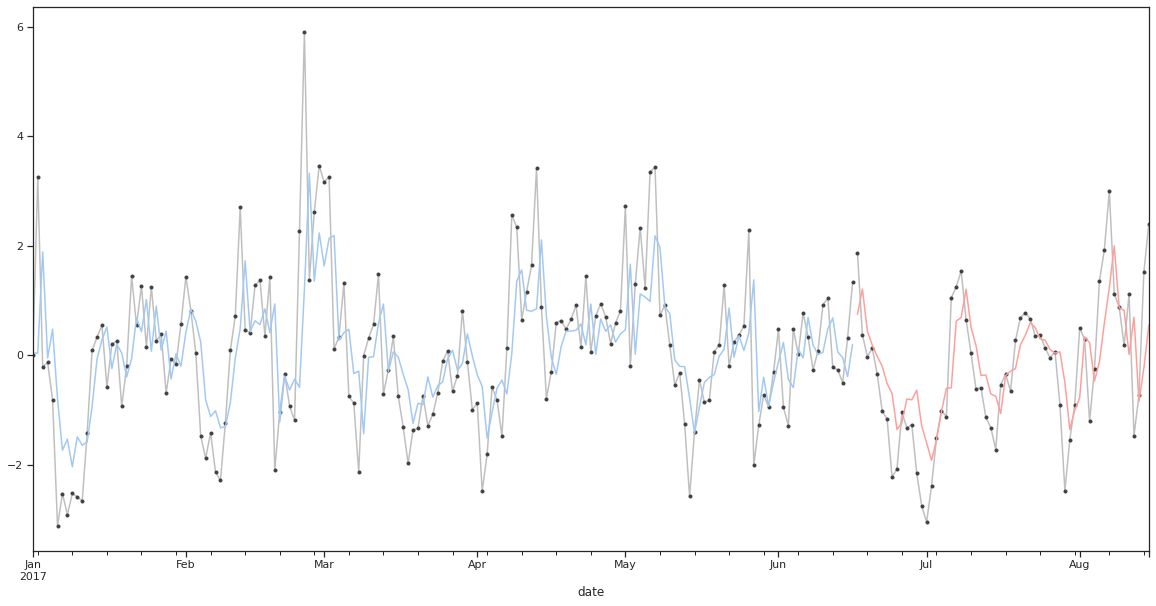

In [149]:
# 훈련, 검증 데이터 분할
y = y_deseason.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 60, shuffle = False)

# fit and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index = y_test.index)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20,10))
ax = y_train.plot(color = "0.75", style = ".-", markeredgecolor = "0.25", markerfacecolor = "0.25", ax=ax)
ax = y_test.plot(color = "0.75", style = ".-", markeredgecolor = "0.25", markerfacecolor = "0.25", ax=ax)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color ='C3')
plt.show()

#### 4. Hybrid Models
- 선형 회귀는 추세를 외삽하는 데 탁월하지만 상호작용을 배울 수는 없다. XGBoost는 상호작용 학습에 탁월하지만 추세를 추정할 수는 없다. 여기에서 우리는 보완 학습 알고리즘을 결합하고 한 알고리즘의 강점이 다른 알고리즘의 약점을 보완하도록 하는 '하이브리드 모델'을 만드는 방법을 배운다.